<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4: Web Scraping Job Postings

Detailed instructions are in Readme.md 
My answers for this Project are split into several notebooks to make it easier to review key sections and make changes where needed. In 1.2, I work on visualising the jobs data.

In [1]:
%load_ext blackcellmagic

In [40]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import scattertext as st
import seaborn as sns
import spacy
import squarify

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from os import path
from PIL import Image
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator

mpl.rcParams["figure.dpi"] = 300
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [3]:
jobs = pd.read_csv('../data/jobs_clean.csv')

In [4]:
jobs.head()

Company                               Title  \
0  HITACHI CONSULTING SINGAPORE   Senior Consultant (Data Scientist)   
1            TRAVELOKA SERVICES                    Data Science Lead   
2            TRAVELOKA SERVICES          Senior Level Data Scientist   
3            TRAVELOKA SERVICES    Mid - Senior Level Data Scientist   
4            TRAVELOKA SERVICES             Mid Level Data Scientist   

                                    Responsibilities  \
0   Problem solver with curious mindset with a hi...   
1  As a Data scientist, you play a key role to so...   
2  Job Description As a Data scientist, you will ...   
3  As a Data scientist, you will be applying mach...   
4  As a Data scientist, you will be applying mach...   

                                        Requirements         Seniority  \
0   Sound knowledge of machine learning concepts....  Senior Executive   
1  We are looking for someone with:  Passion in b...           Manager   
2    Solid programming skills and understanding o...         Executive   
3    Solid programming skills and understanding o...         Executive   
4    Solid programming skills and understanding o...         Executive   

       Employment_Type                Category  \
0  Permanent, Contract  Information Technology   
1            Full Time  Information Technology   
2            Permanent  Information Technology   
3            Permanent  Information Technology   
4            Permanent  Information Technology   

                                             Address  Salary_Min  Salary_Max  \
0  PLAZA 8 @ CBP, 1 CHANGI BUSINESS PARK CRESCENT...      6000.0      9000.0   
1                                        Undisclosed     10000.0     15000.0   
2                                        Undisclosed      8300.0     15000.0   
3                                        Undisclosed      6100.0     10700.0   
4                                        Undisclosed      4300.0      7600.0   

   Salary_Average  
0          7500.0  
1         12500.0  
2         11650.0  
3          8400.0  
4          5950.0

In [5]:
jobs.shape

(905, 11)

### 1. VISUALISING KEY COLUMNS

### 1.1 SALARY INFO

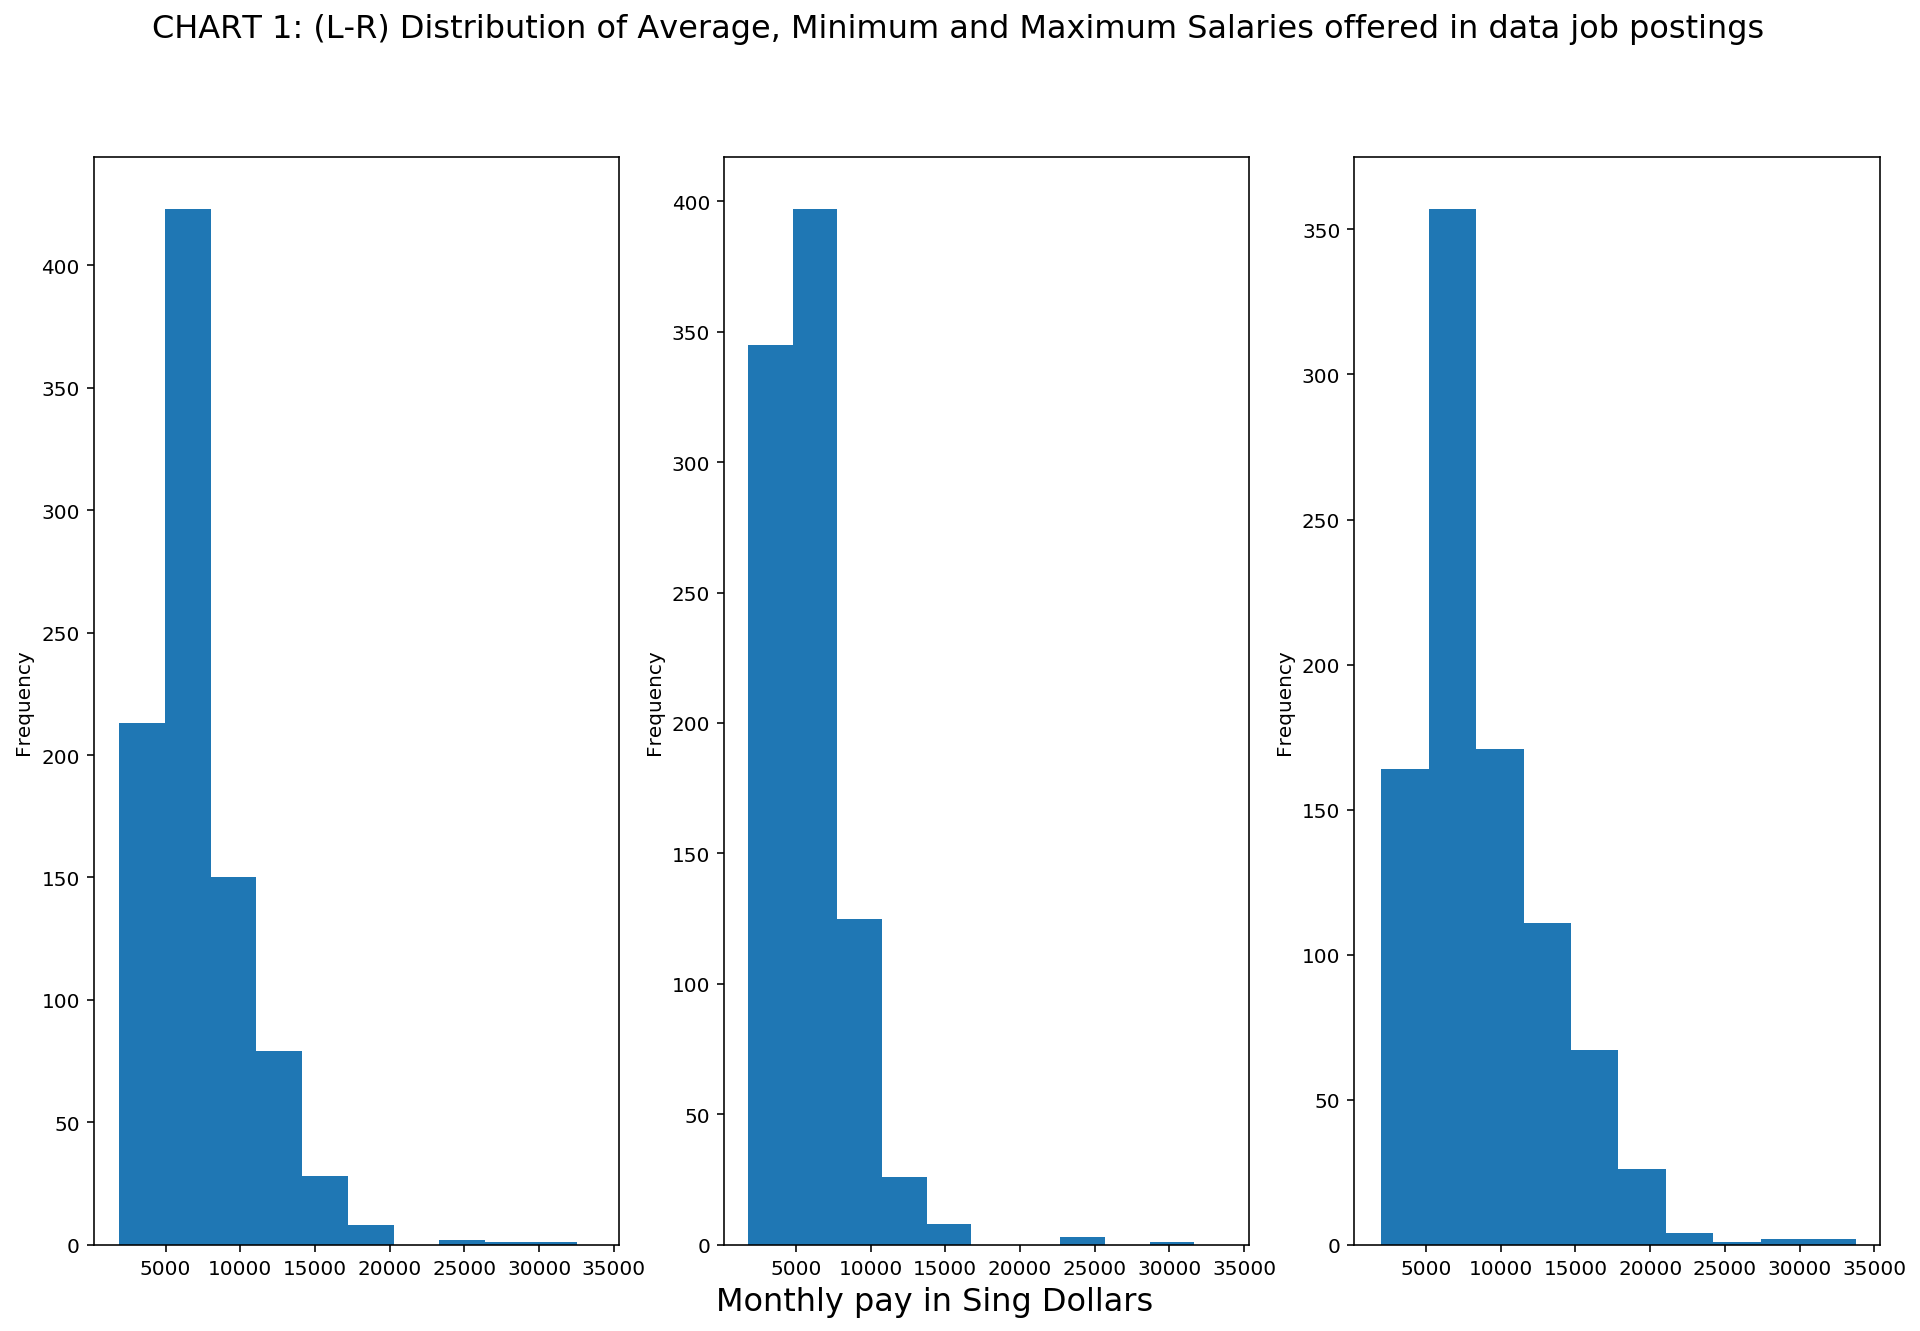

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(16, 10), sharex=True)
jobs["Salary_Average"].plot(kind="hist", ax=axs[0])
jobs["Salary_Min"].plot(kind="hist", ax=axs[1])
jobs["Salary_Max"].plot(kind="hist", ax=axs[2])
fig.suptitle(
    "CHART 1: (L-R) Distribution of Average, Minimum and Maximum Salaries offered in data job postings",
    fontsize=16,
)
plt.xlabel("Monthly pay in Sing Dollars", fontsize=16, horizontalalignment='center', x=-0.8)
plt.show()

### 1.2 MOST FREQUENTLY USED JOB TITLE, SENIORITY IN JOB POSTINGS
Unsurprisingly, "data scientist" was the most popular job title. But it accounted for only 4.2% of the 905 job titles in the dataset, reflecing the wide range of titles HR departments slap on such positions. Meanwhile, the most commonly used terms to describe the desired level of seniority were "professional", "executive" and "manager".

In [7]:
jobs['Title'].value_counts().head()

Data Scientist                                 38
Research Fellow                                28
Data Engineer                                  21
Data Engineer (5 days, Orchard, $3500-4000)    17
Manager                                        15
Name: Title, dtype: int64

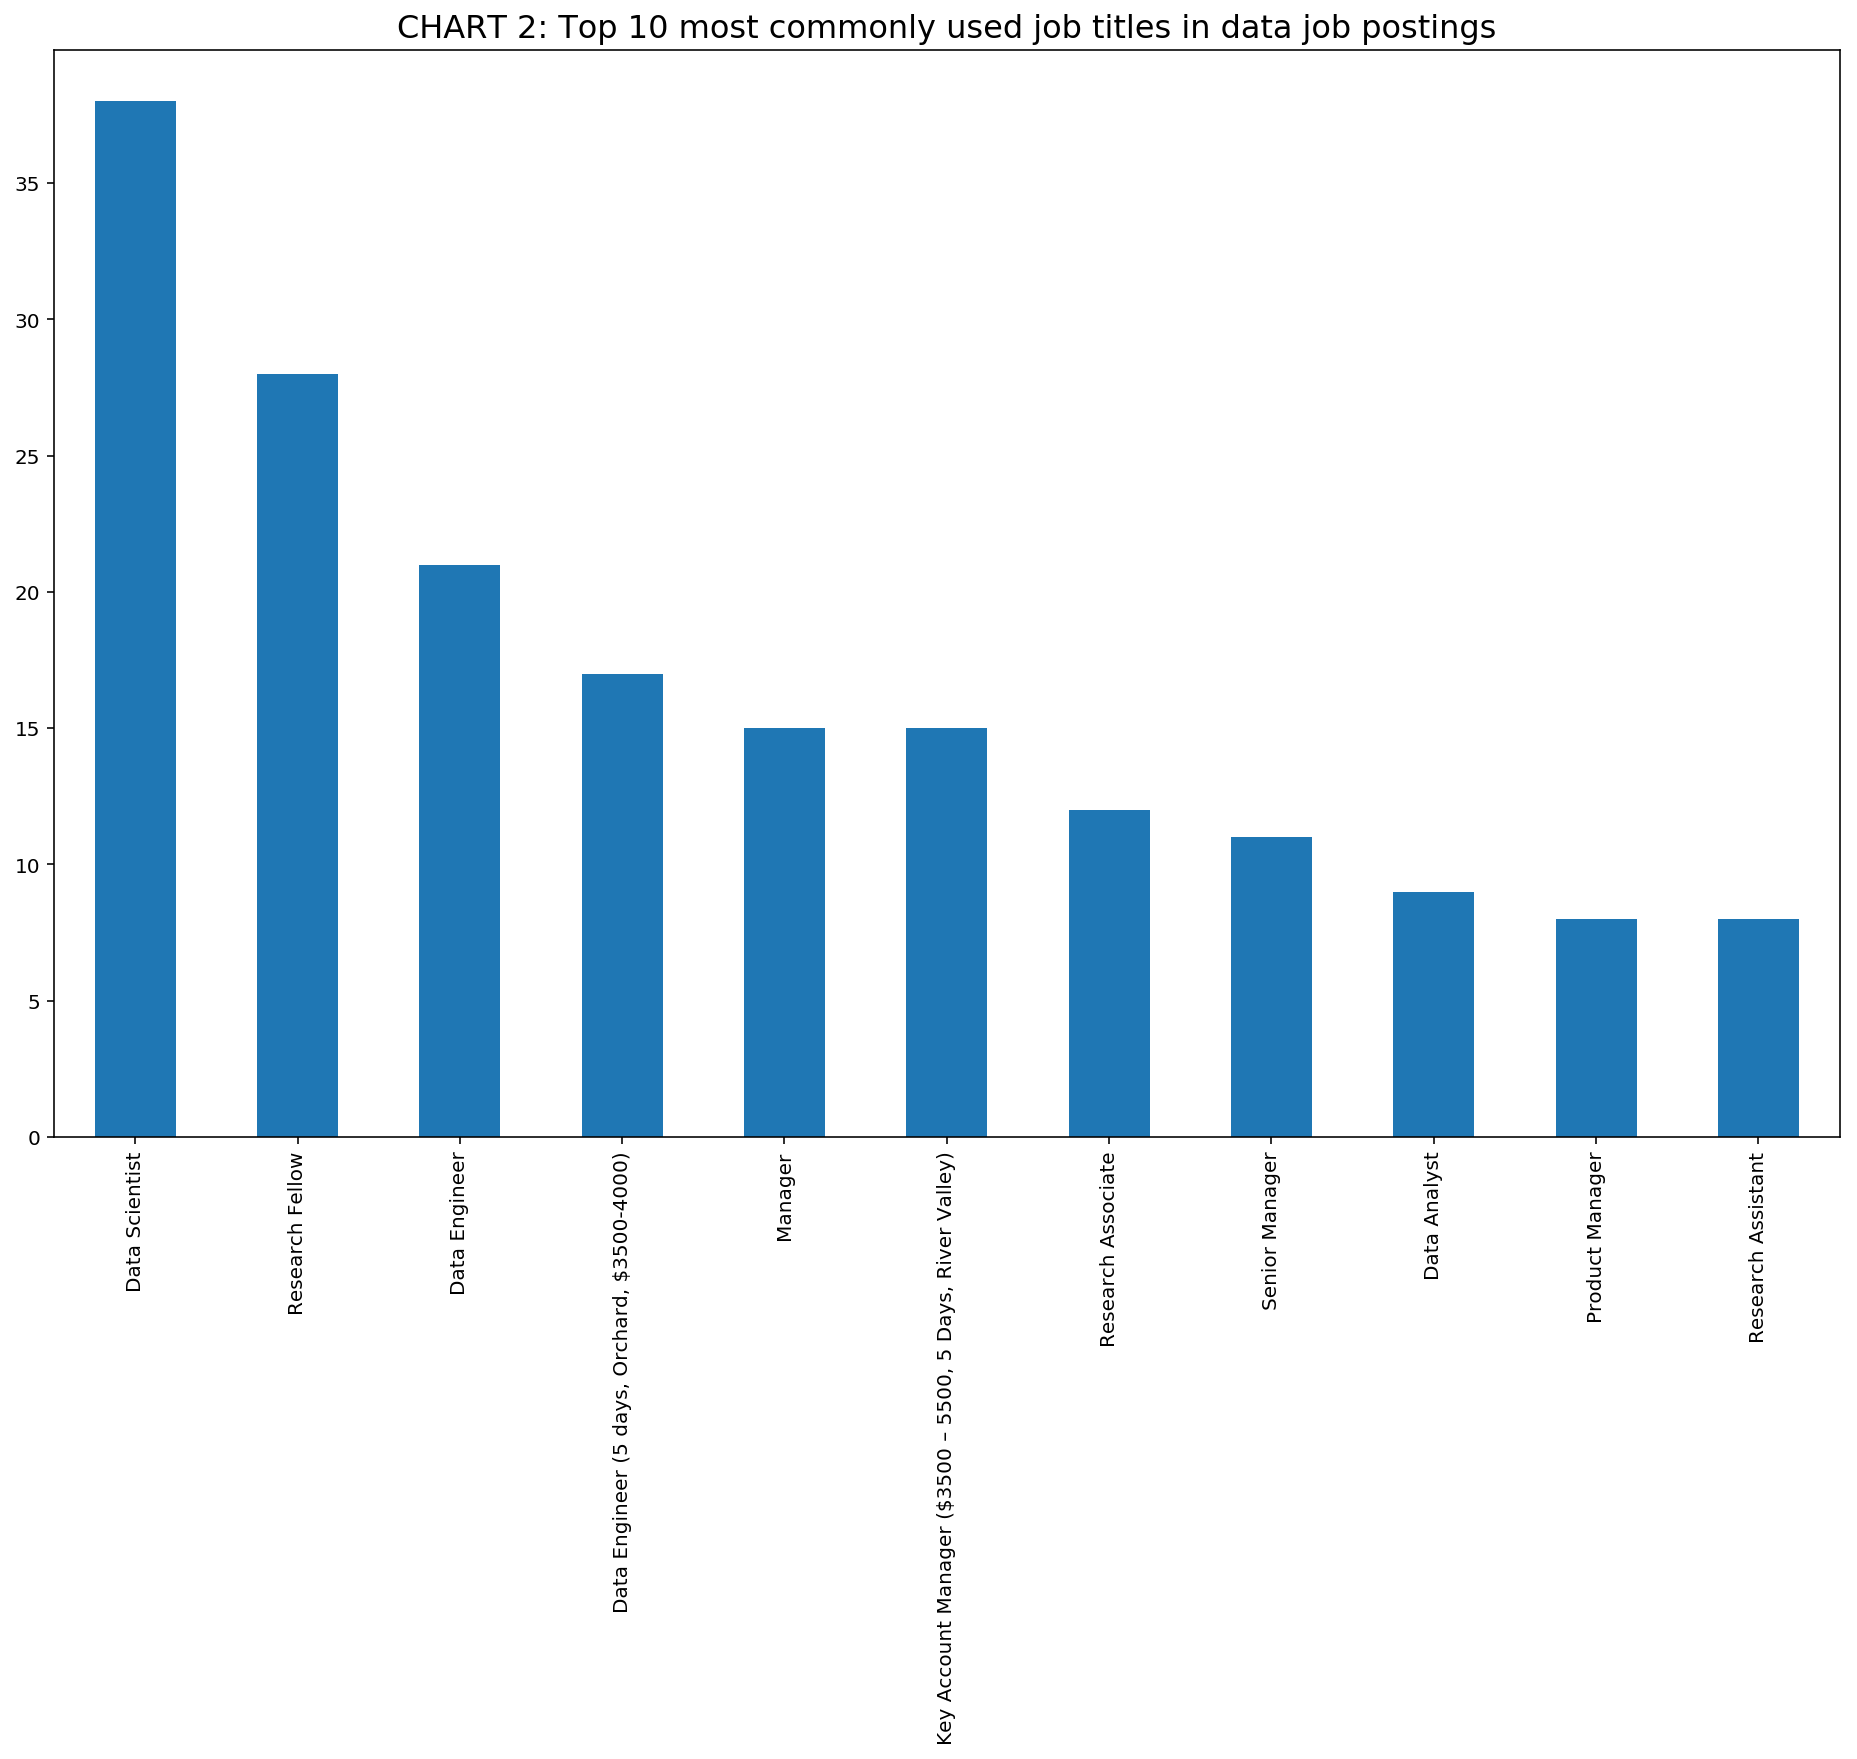

In [8]:
jobs["Title"].value_counts().plot(kind="bar", figsize=(16, 10))
plt.title(
    "CHART 2: Top 10 most commonly used job titles in data job postings", fontsize=16
)
plt.xlim(-0.5, 10.5)
plt.show()

In [9]:
jobs['Seniority'].value_counts().head()

Professional         249
Executive            172
Manager              117
Senior Executive      75
Middle Management     48
Name: Seniority, dtype: int64

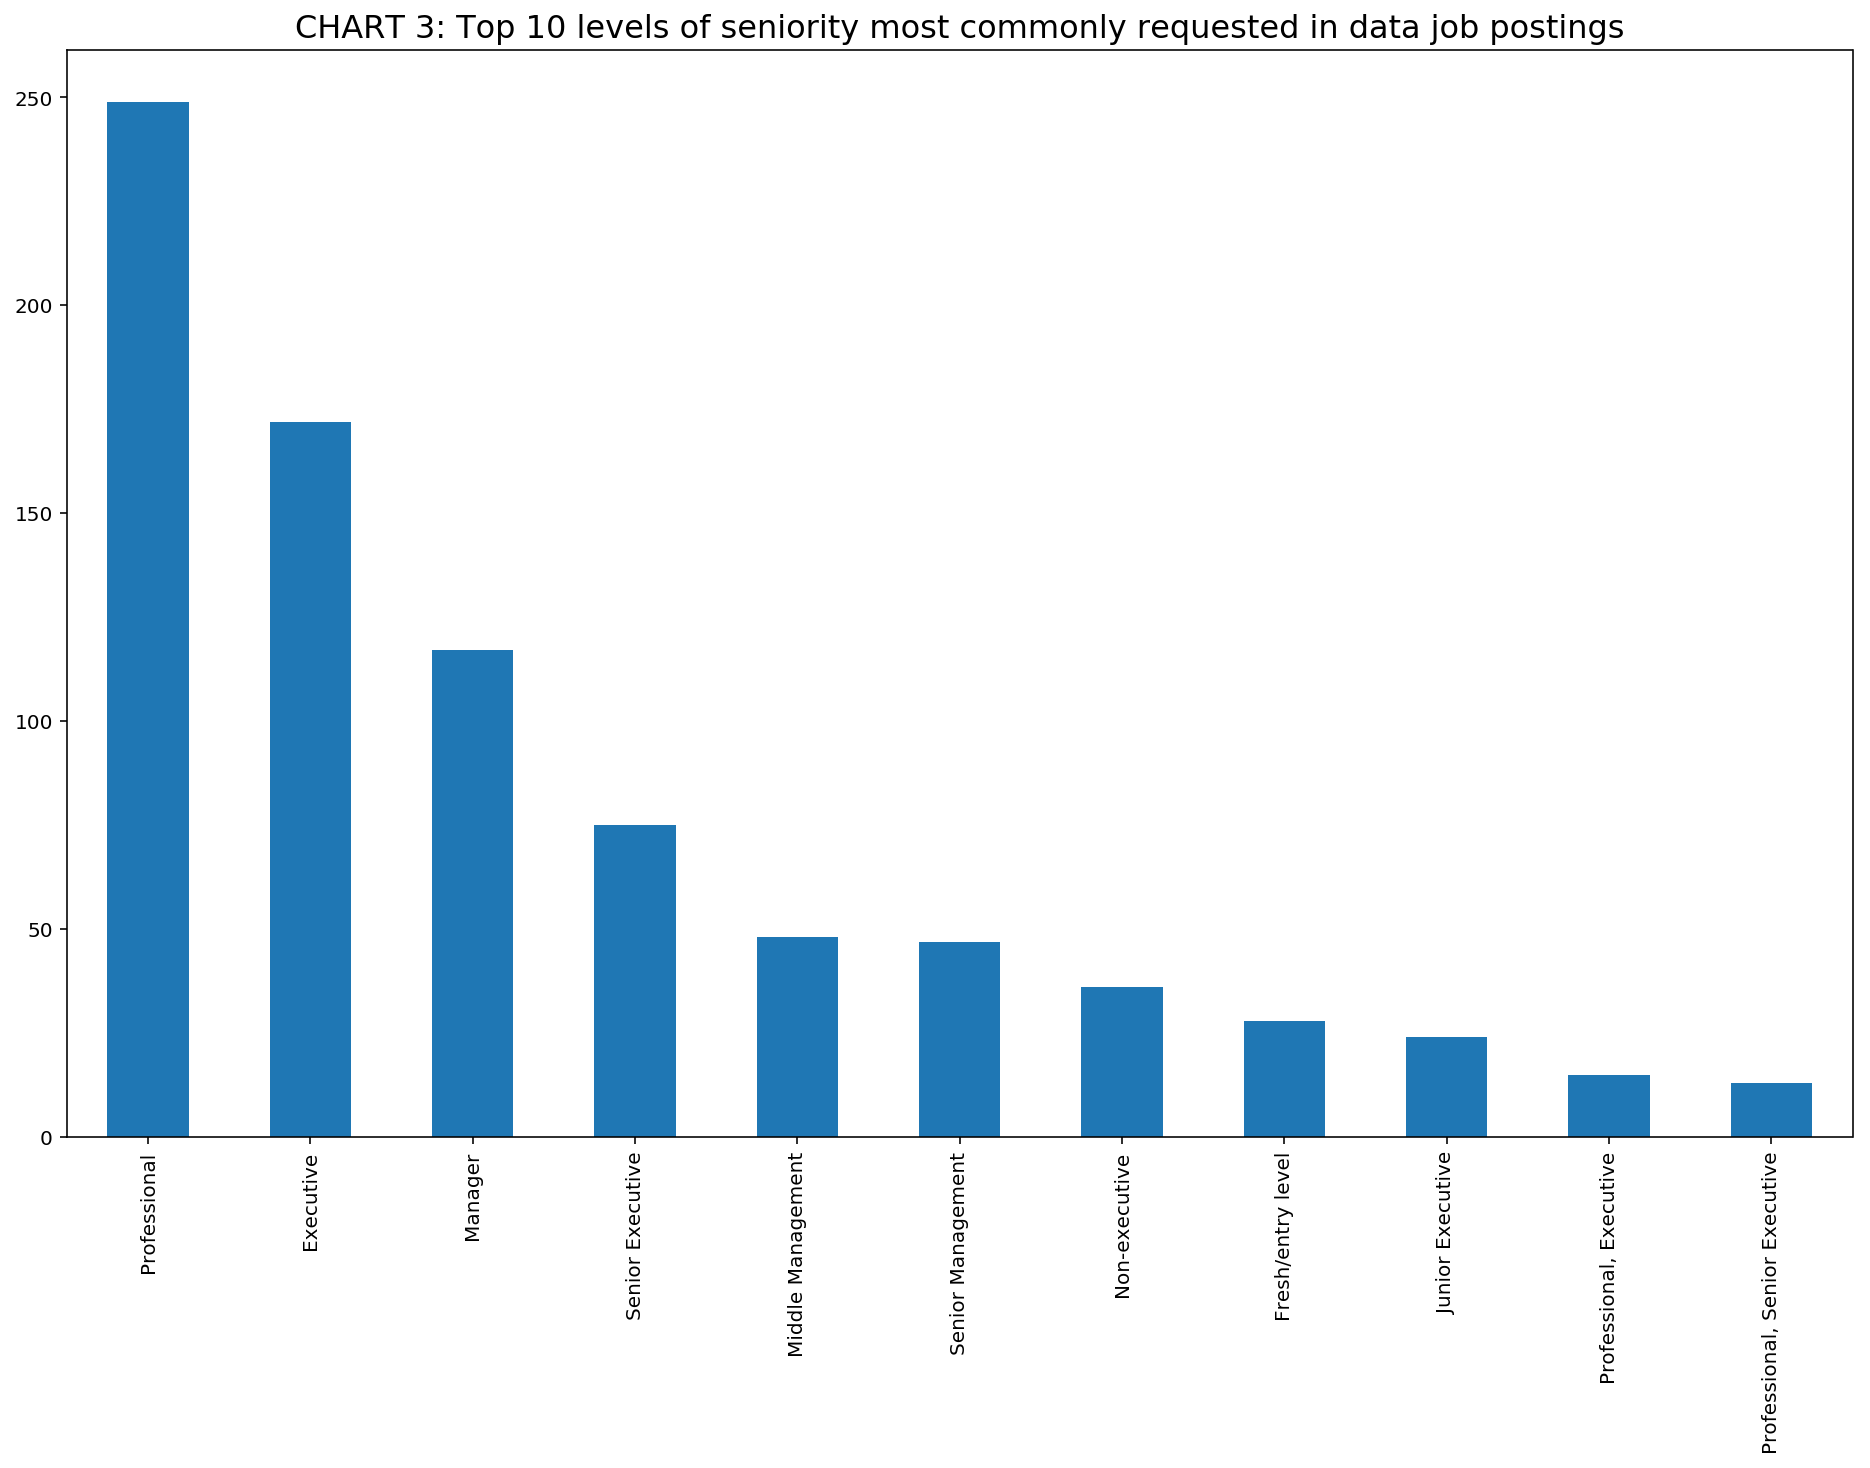

In [10]:
jobs["Seniority"].value_counts().plot(kind="bar", figsize=(16, 10))
plt.title(
    "CHART 3: Top 10 levels of seniority most commonly requested in data job postings", fontsize=16
)
plt.xlim(-0.5, 10.5)
plt.show()

### 1.3 MOST FREQUENTLY OFFERED EMPLOYMENT CONDITIONS AND CATEGORIES CITED
Employers, who mostly identify themselves as being in the IT and research sectors, are predominantly looking for full-time permanent staff.

In [11]:
jobs['Employment_Type'].value_counts().head()

Full Time               295
Permanent               241
Permanent, Full Time    143
Contract, Full Time     116
Contract                 76
Name: Employment_Type, dtype: int64

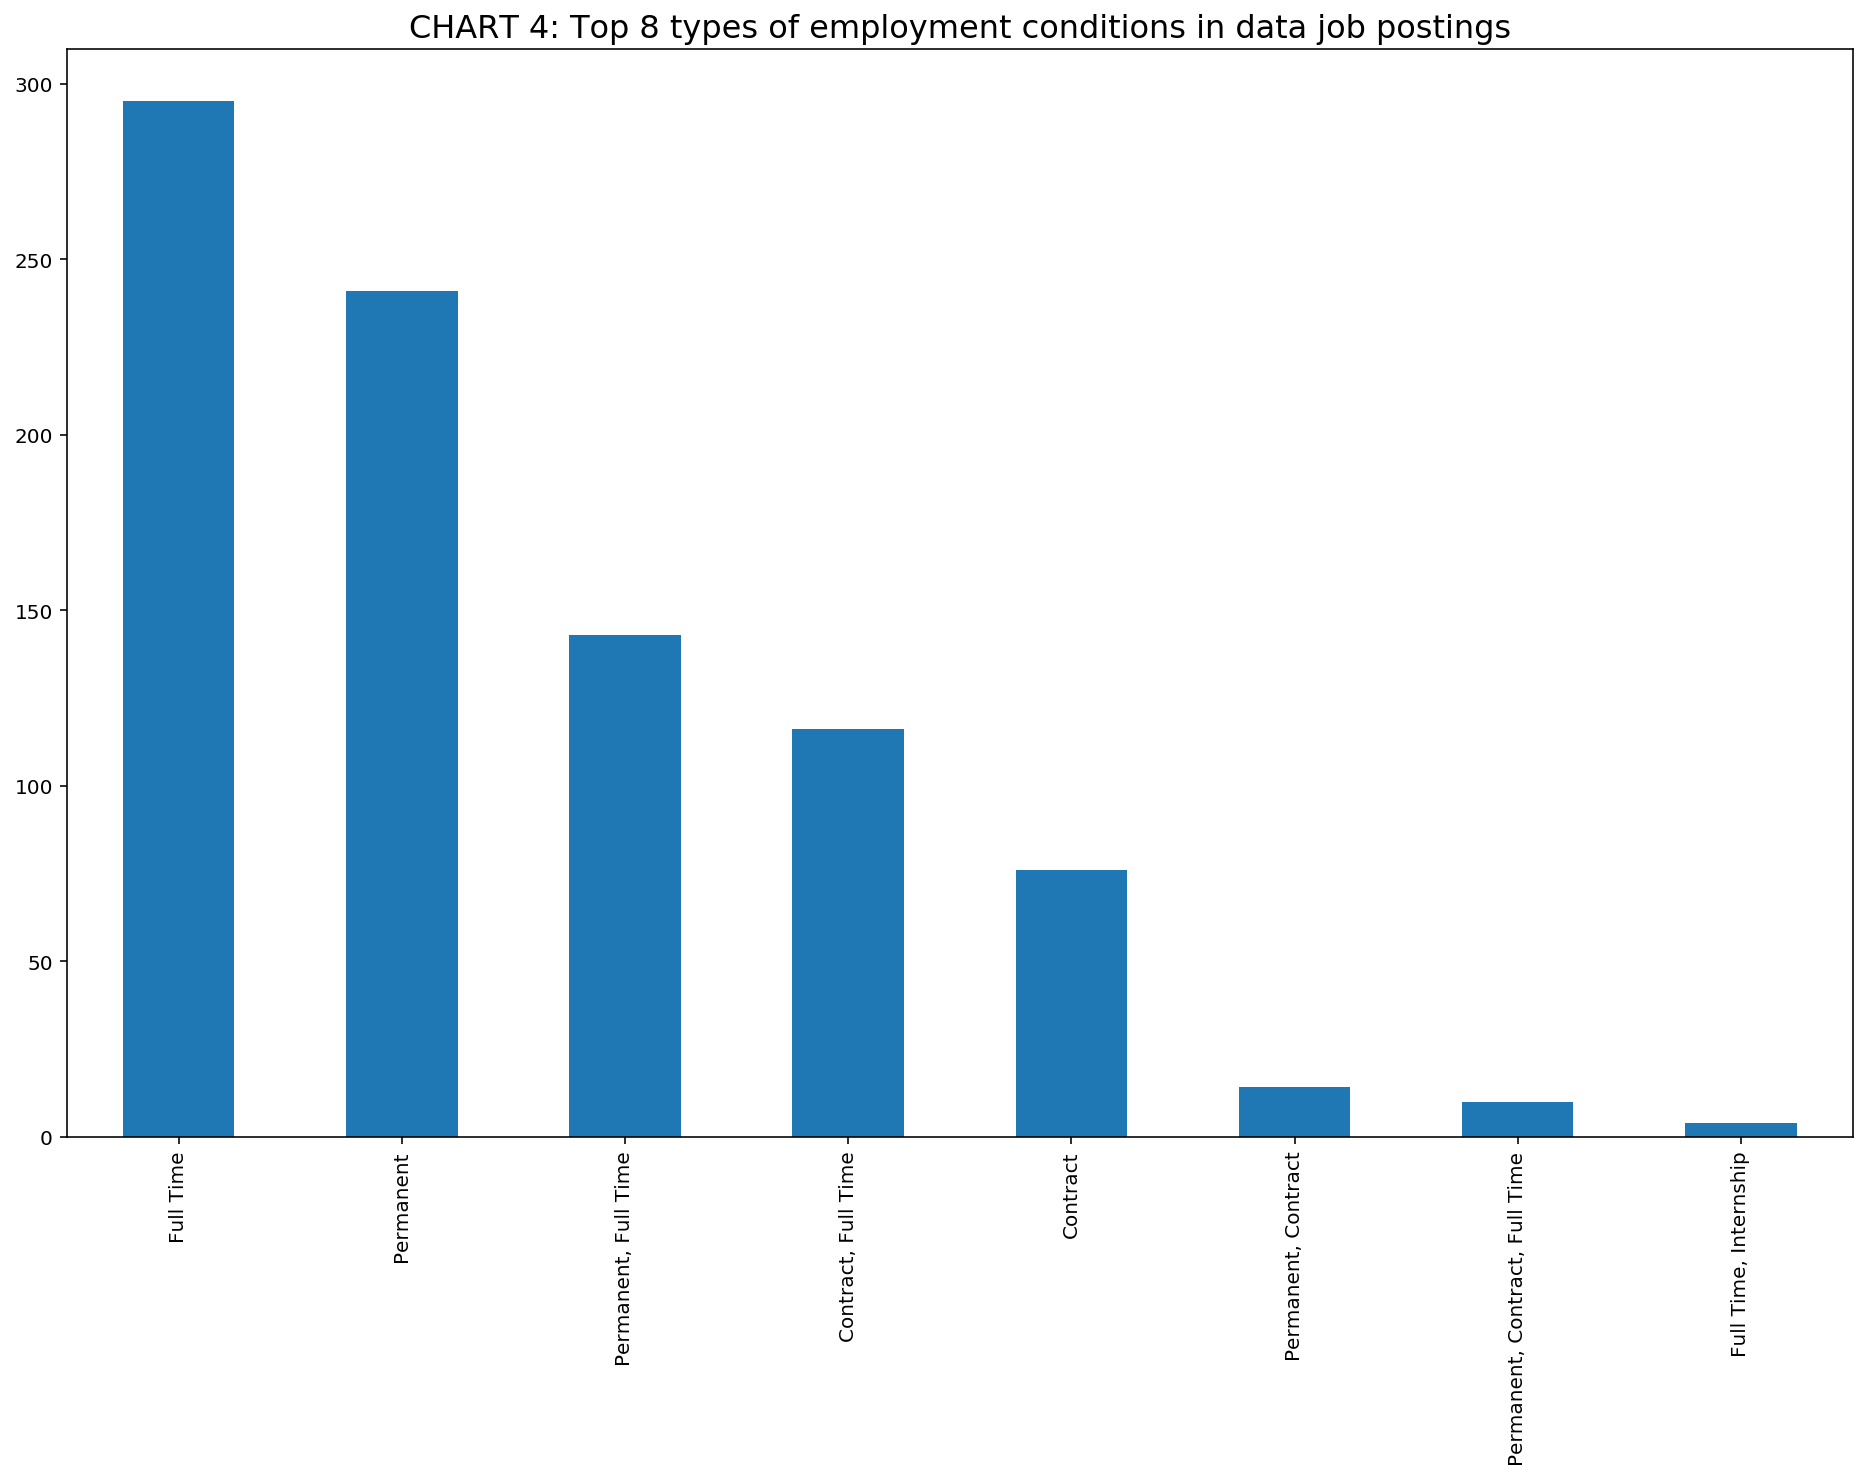

In [12]:
jobs["Employment_Type"].value_counts().plot(kind="bar", figsize=(16, 10))
plt.title(
    "CHART 4: Top 8 types of employment conditions in data job postings", fontsize=16
)
plt.xlim(-0.5, 7.5)
plt.show()

In [13]:
jobs['Category'].value_counts().head()

Information Technology         345
Sciences / Laboratory / R&D     68
Banking and Finance             67
Engineering                     58
Others                          28
Name: Category, dtype: int64

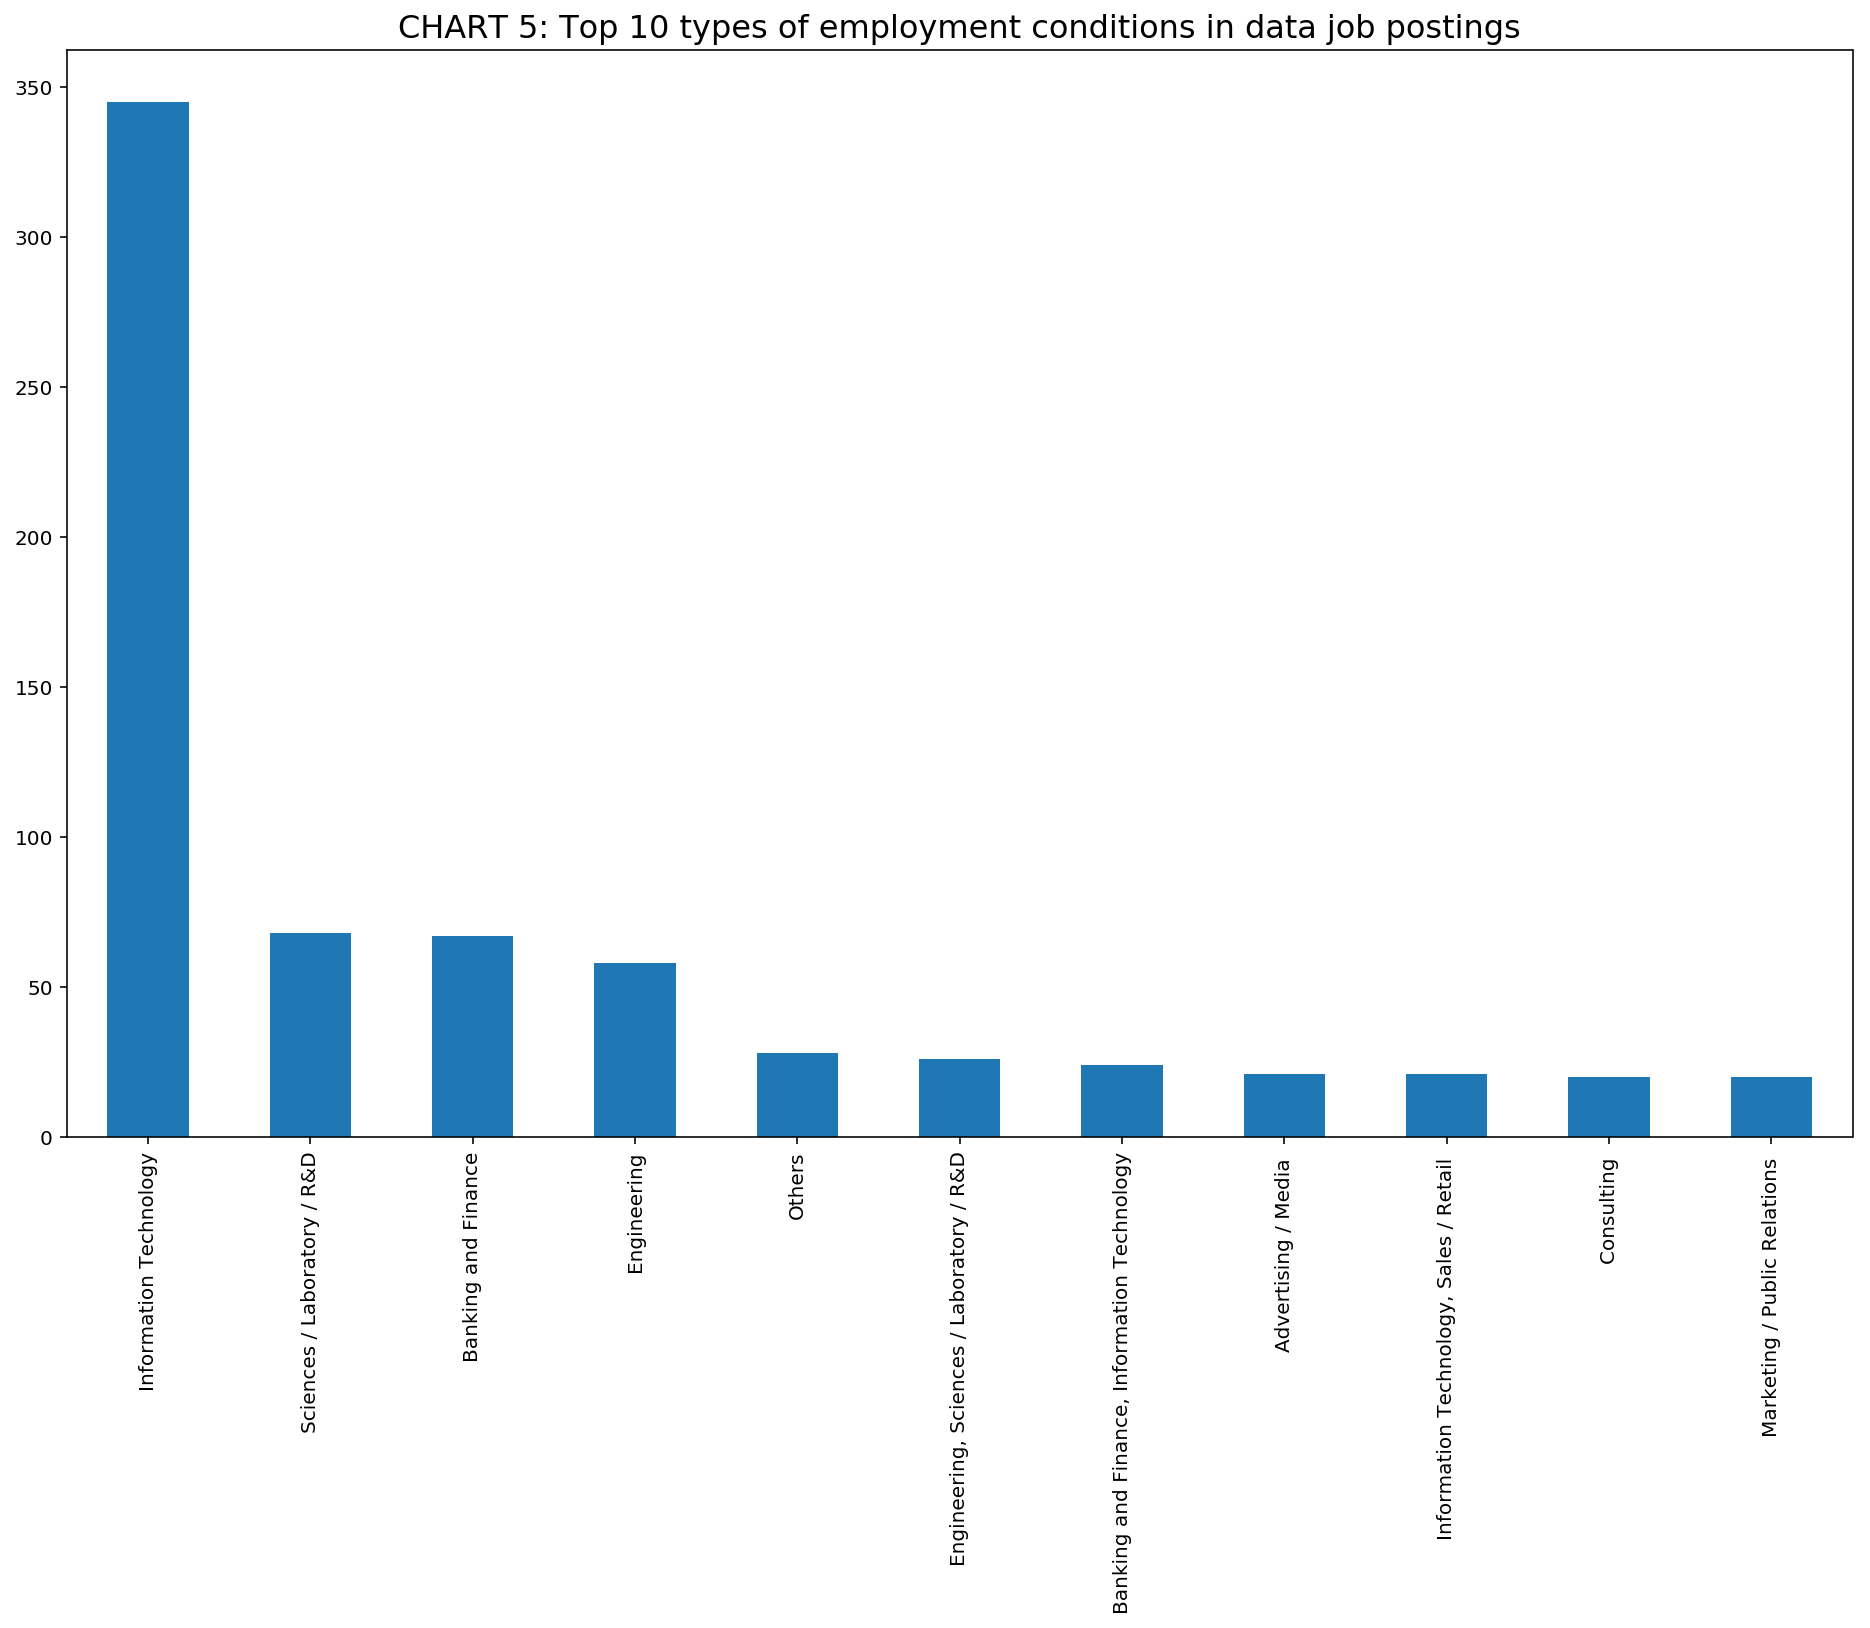

In [14]:
jobs["Category"].value_counts().plot(kind="bar", figsize=(16, 10))
plt.title(
    "CHART 5: Top 10 types of employment conditions in data job postings", fontsize=16
)
plt.xlim(-0.5, 10.5)
plt.show()

### 1.2 HOW AVERAGE SALARY VARIES ACROSS KEY ATTRIBUTES

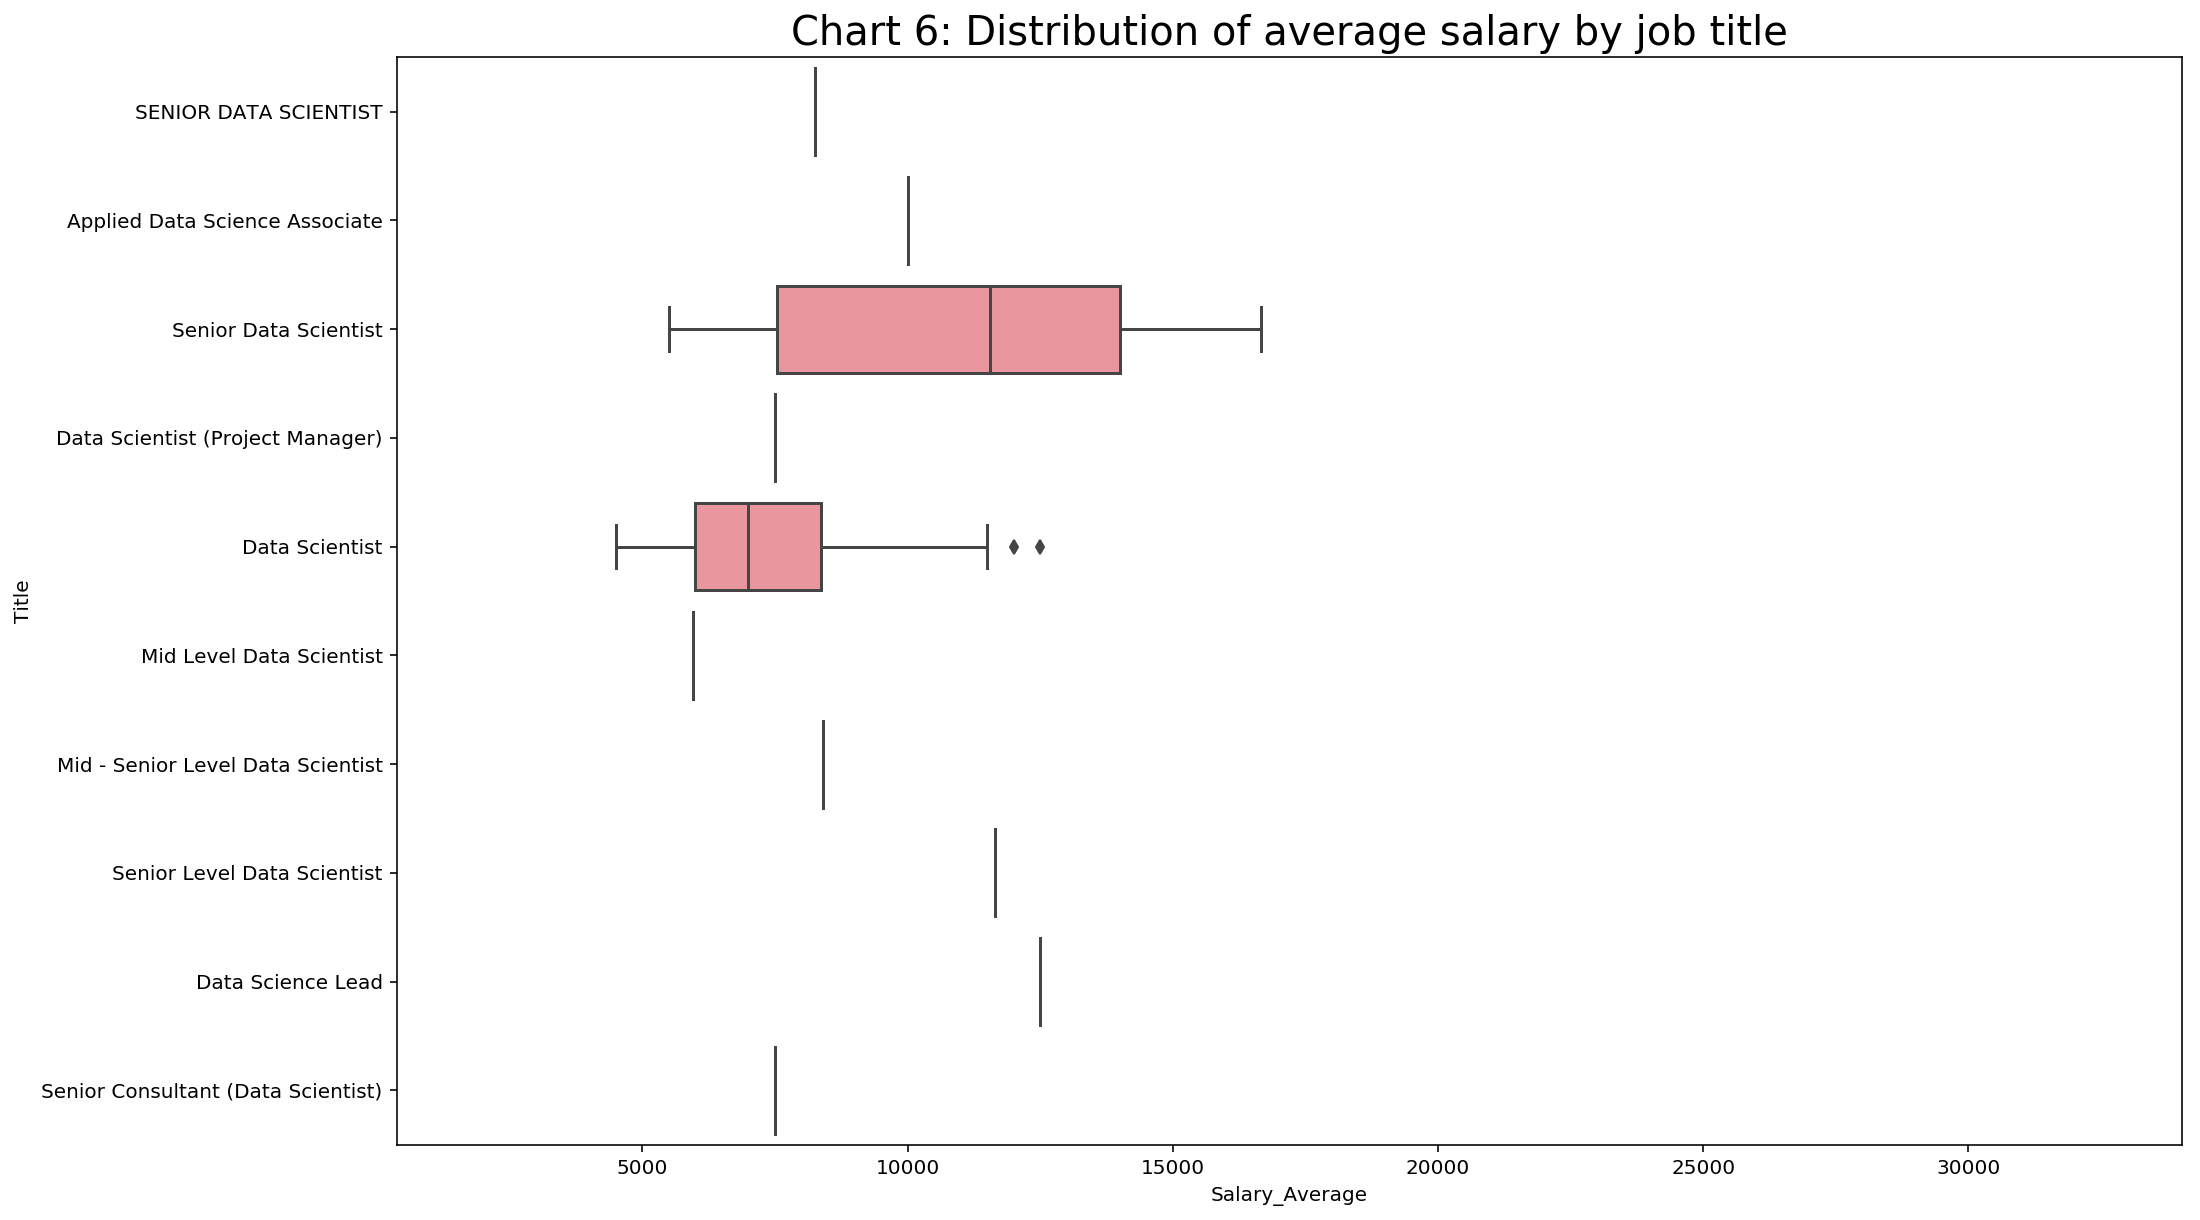

In [15]:
plt.figure(figsize=(16,10))
sns.boxplot(x="Salary_Average", y="Title", data=jobs)
plt.title('Chart 6: Distribution of average salary by job title', fontsize=20)
plt.ylim(-0.5, 9.5)
plt.show()

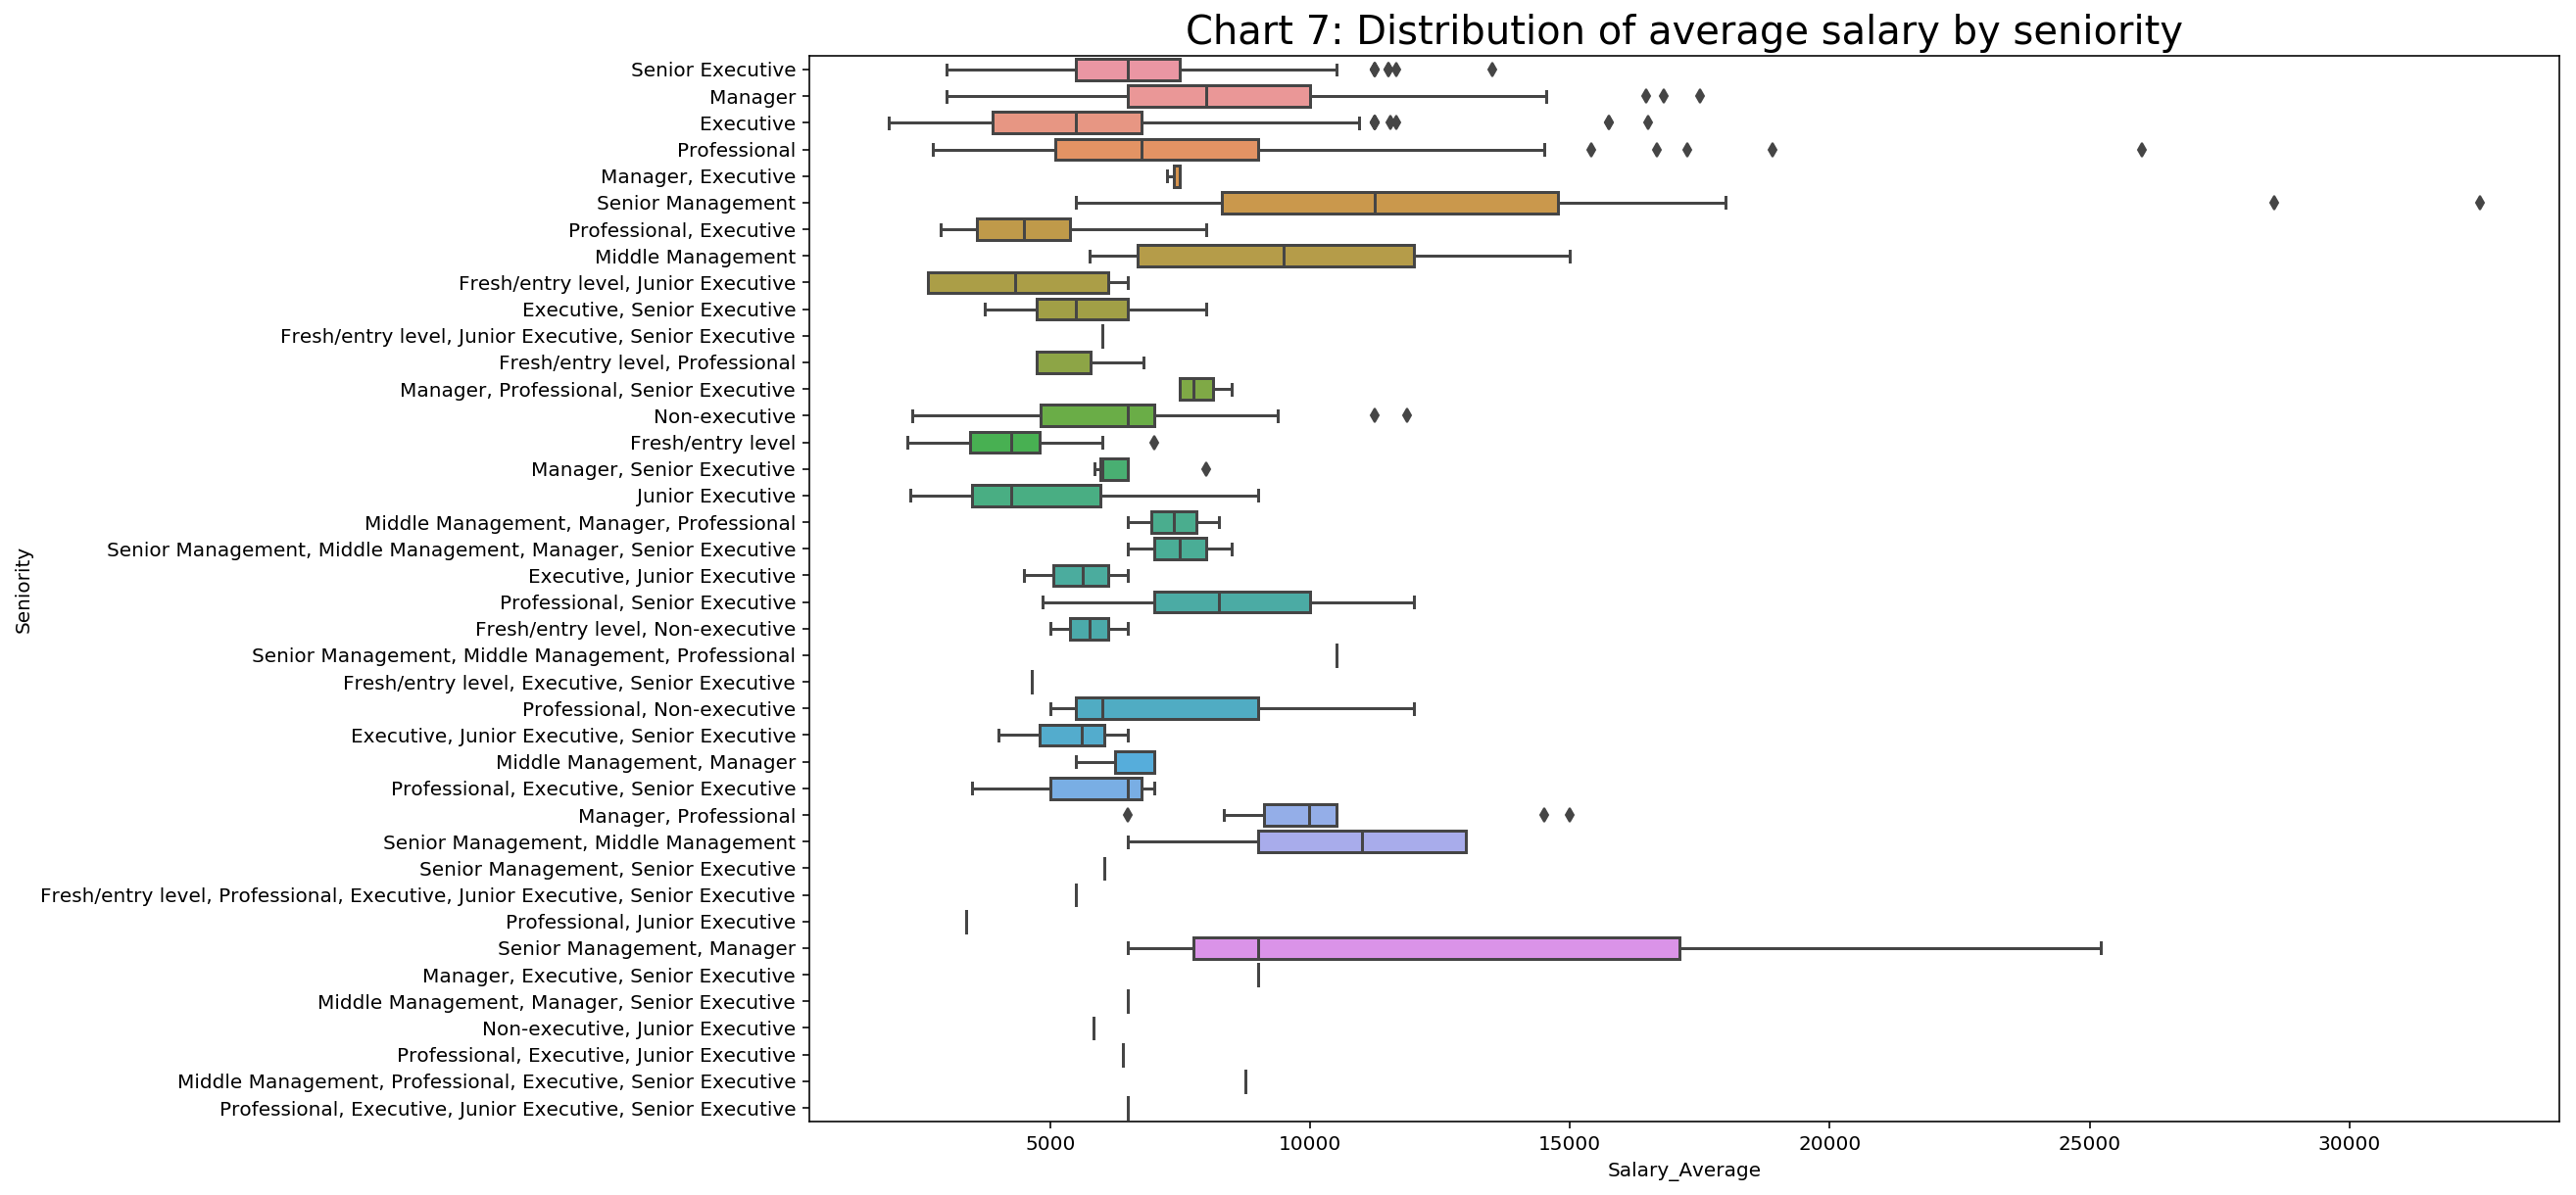

In [16]:
plt.figure(figsize=(16,10))
sns.boxplot(x="Salary_Average", y="Seniority", data=jobs)
plt.title('Chart 7: Distribution of average salary by seniority', fontsize=20)
plt.show()

####  3 clear outliers; to consider what to do with them

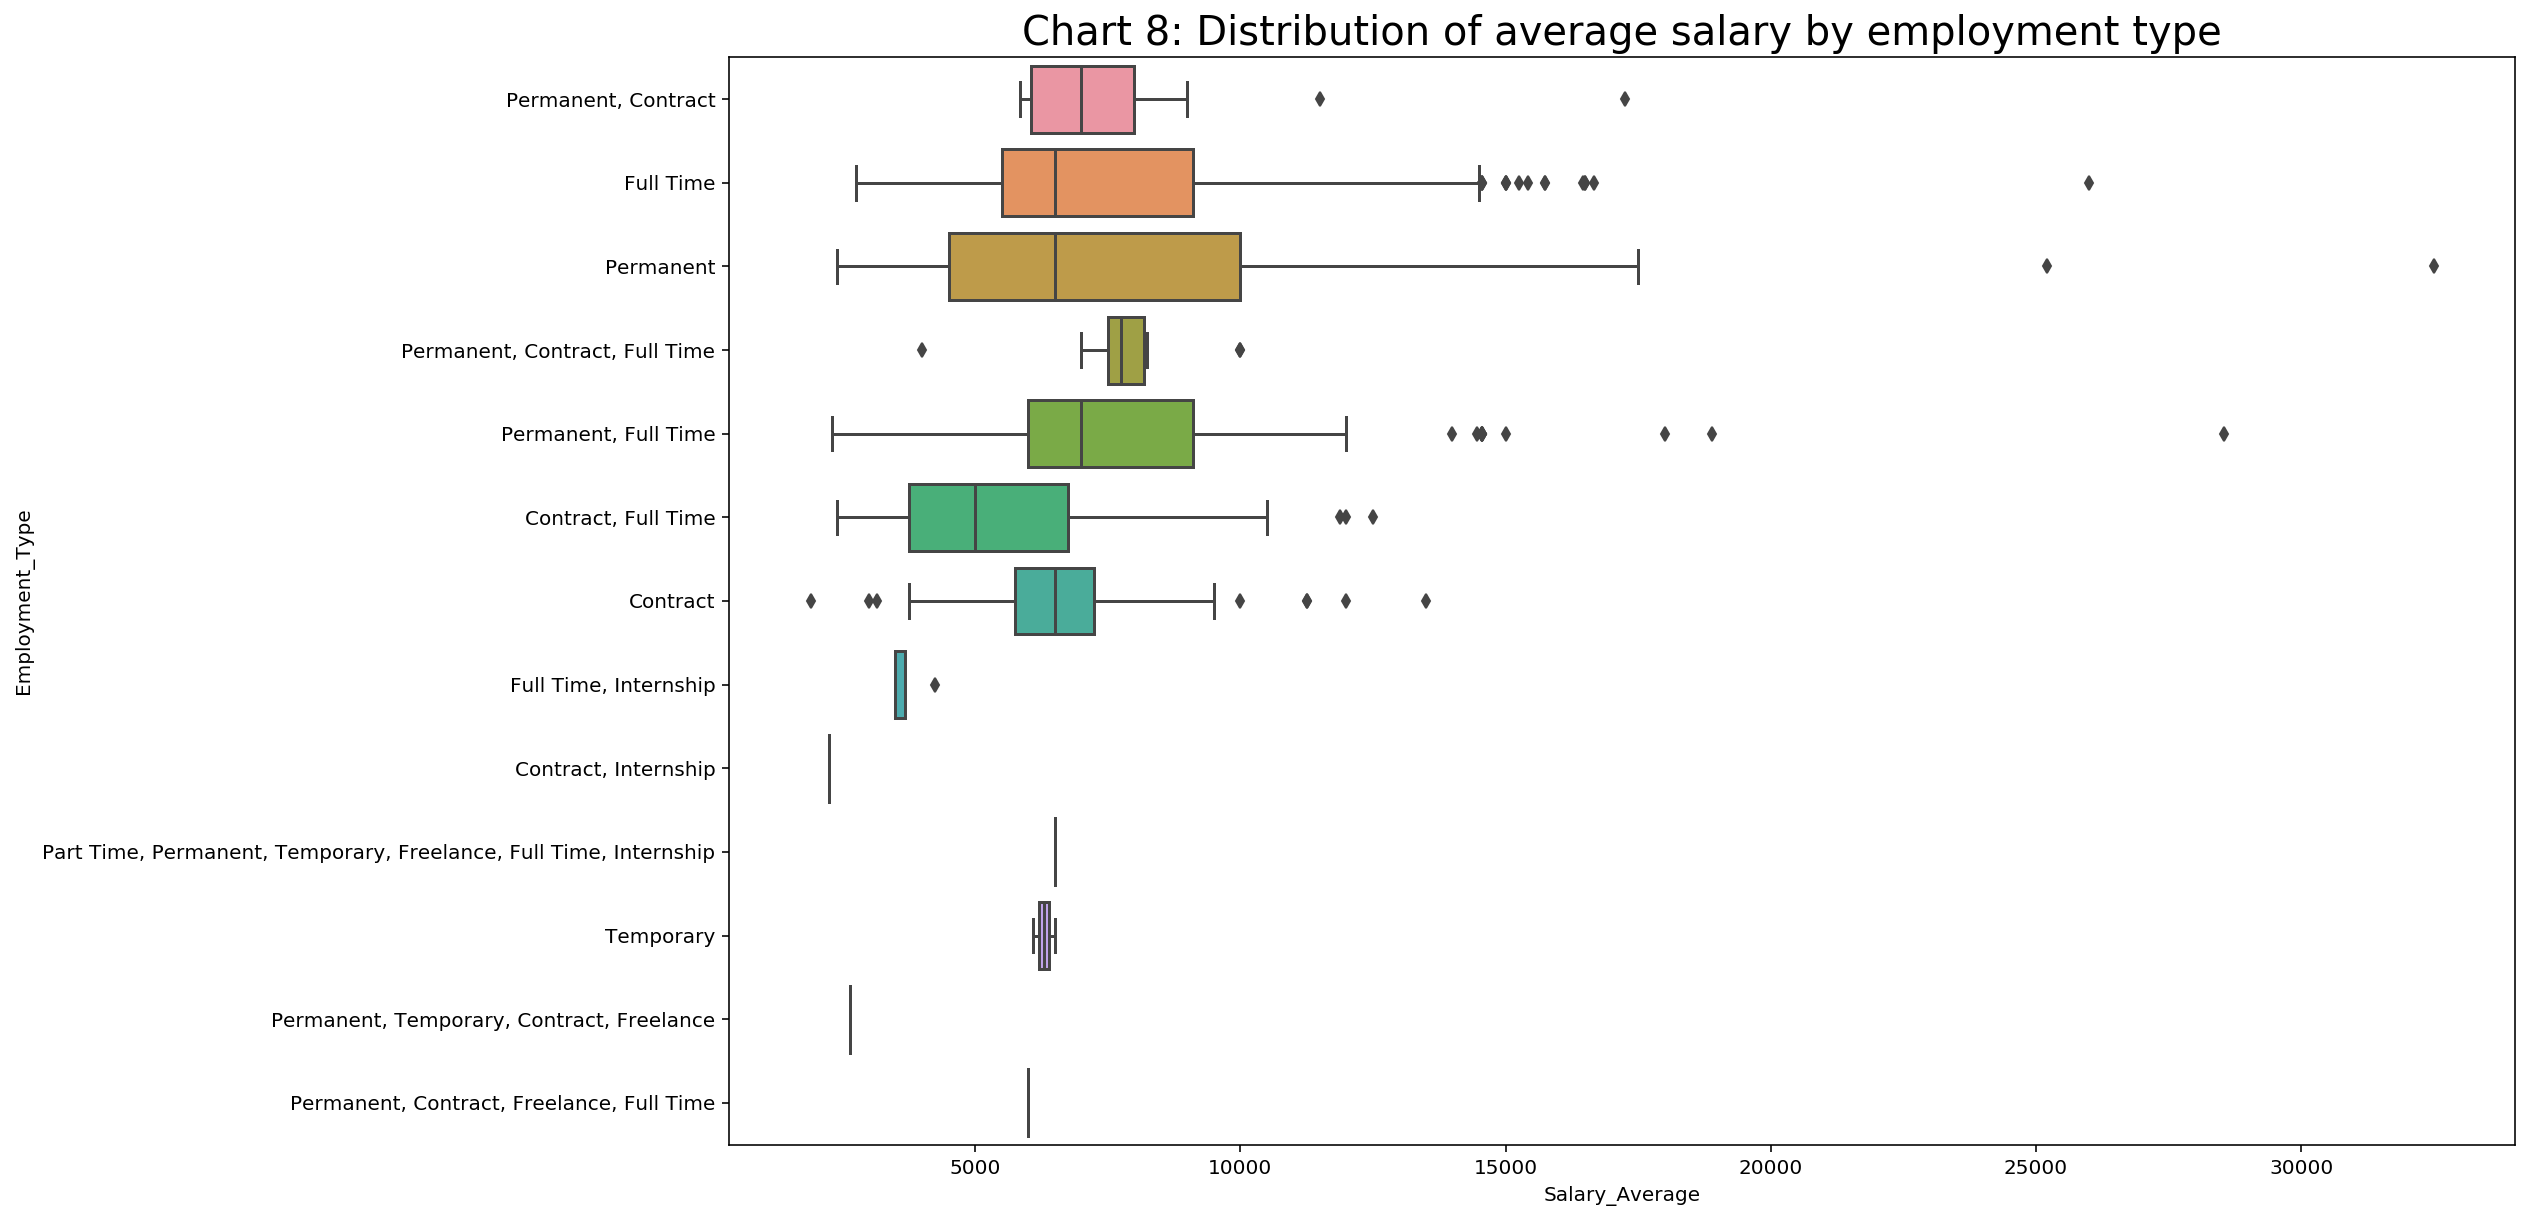

In [17]:
plt.figure(figsize=(16,10))
sns.boxplot(x="Salary_Average", y="Employment_Type", data=jobs)
plt.title('Chart 8: Distribution of average salary by employment type', fontsize=20)
plt.show()

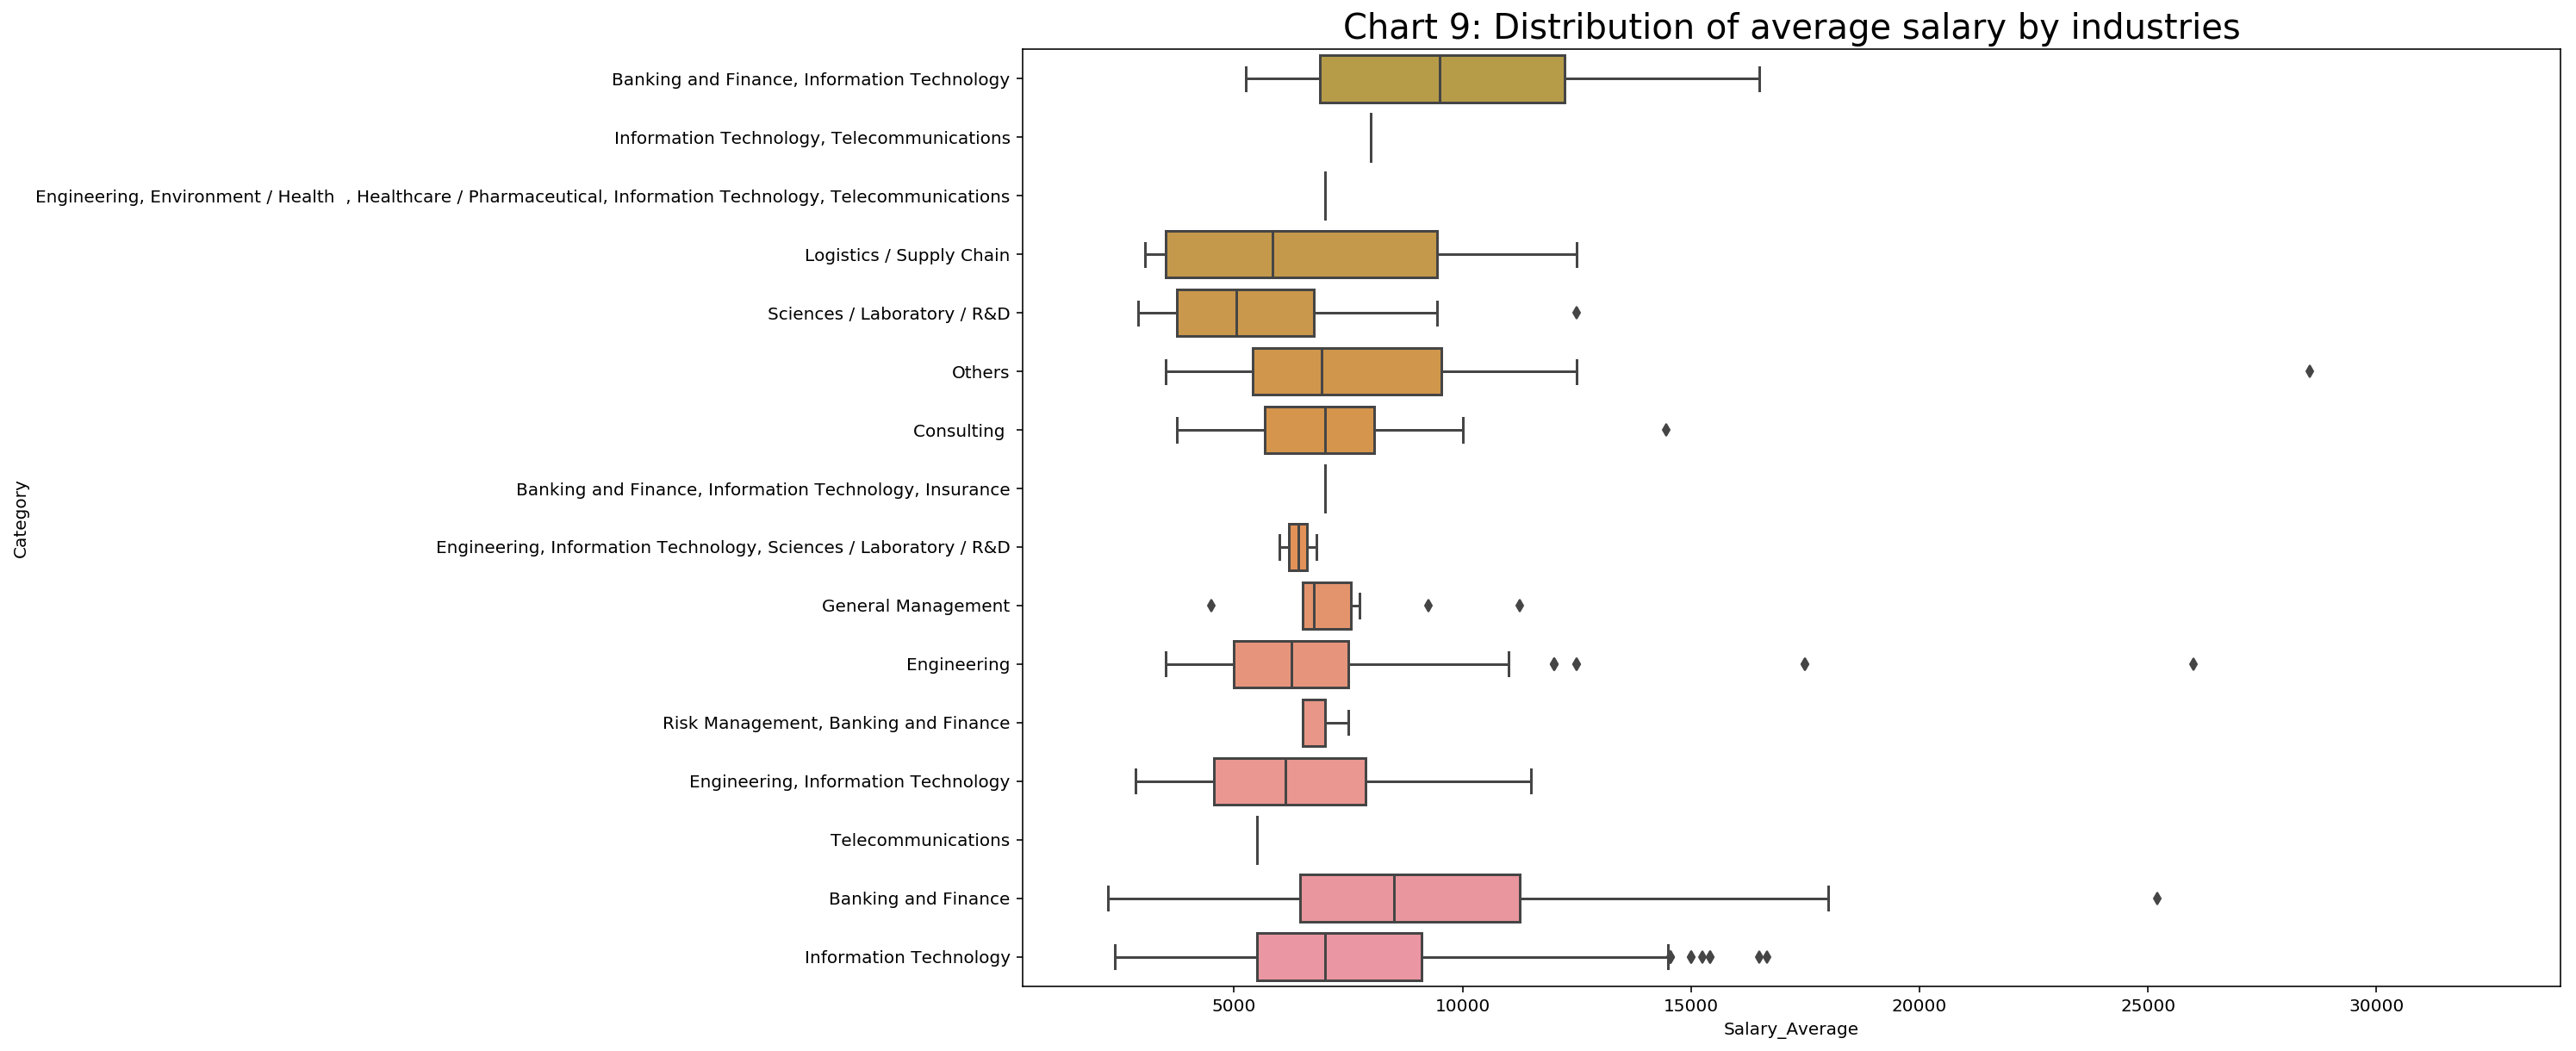

In [18]:
plt.figure(figsize=(16,10))
sns.boxplot(x="Salary_Average", y="Category", data=jobs)
plt.title('Chart 9: Distribution of average salary by industries', fontsize=20)
plt.ylim(-0.5, 15.5)
plt.show()

In [19]:
jobs['Company'].value_counts().head()

Company Undisclosed                 84
NANYANG TECHNOLOGICAL UNIVERSITY    41
MACHSPEED HUMAN RESOURCES           38
A*STAR RESEARCH ENTITIES            37
DBS BANK                            33
Name: Company, dtype: int64

### 2. WORD CLOUDS

In [20]:
res_text = " ".join(text for text in jobs['Responsibilities'])

In [21]:
res = WordCloud(max_font_size=80, max_words=250, width=800, height=600, background_color="white").generate(res_text)

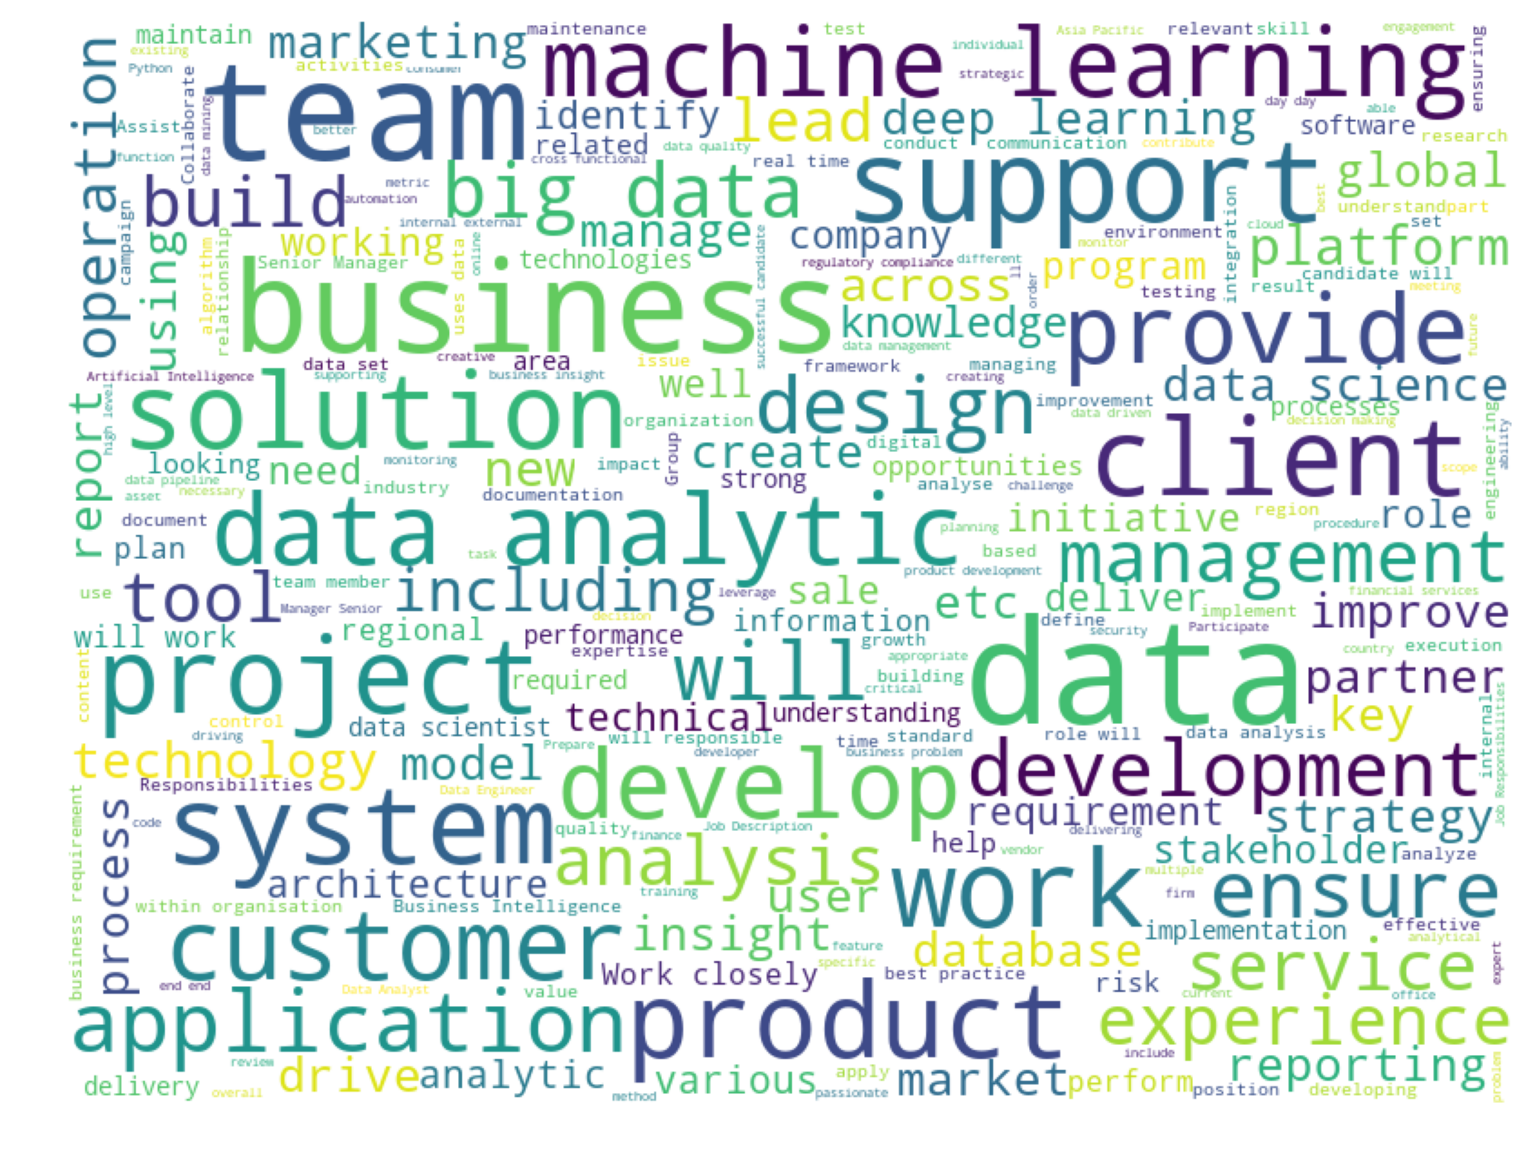

In [22]:
plt.figure(figsize=(20,10))
plt.imshow(res, interpolation='hamming')
plt.axis("off")
plt.show()

In [23]:
requirements_text = " ".join(text for text in jobs['Requirements'])

In [24]:
requirements = WordCloud(
    max_font_size=80, max_words=250, width=800, height=600, background_color="white"
).generate(requirements_text)

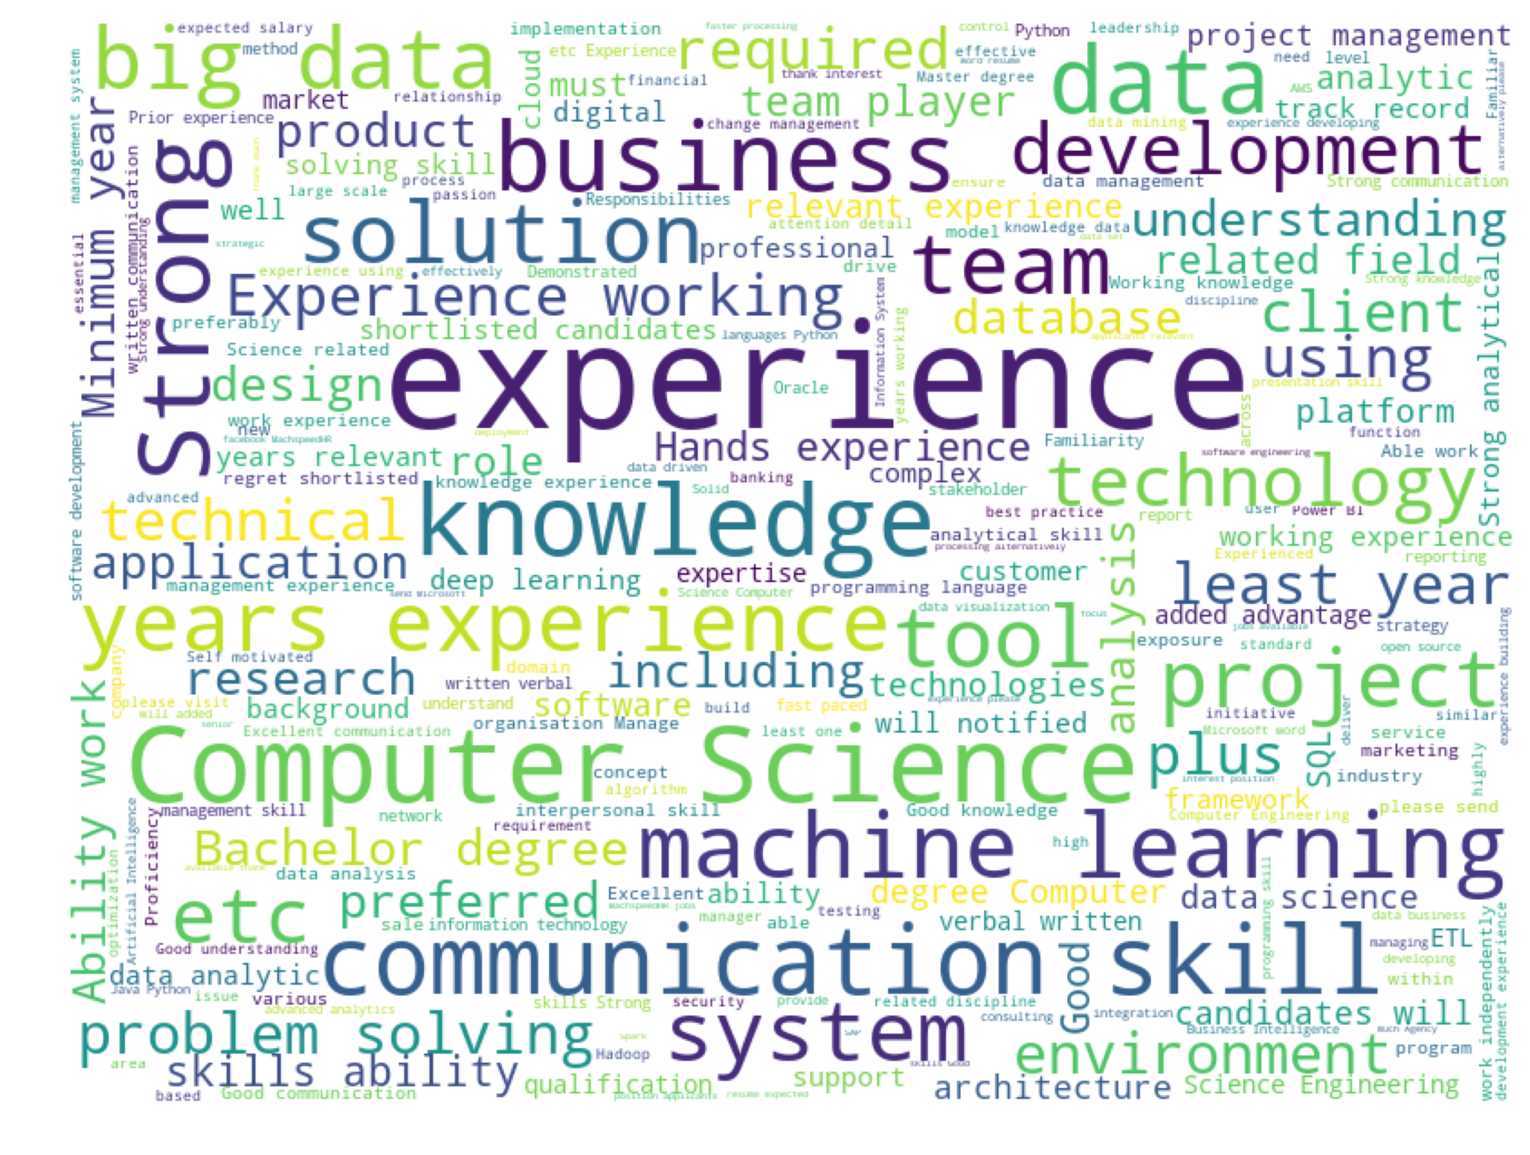

In [25]:
plt.figure(figsize=(20,10))
plt.imshow(requirements, interpolation='hamming')
plt.axis("off")
plt.show()

In [26]:
title_text = " ".join(text for text in jobs['Title'])

In [27]:
titles = WordCloud(
    max_font_size=80, max_words=250, width=800, height=600, background_color="white"
).generate(title_text)

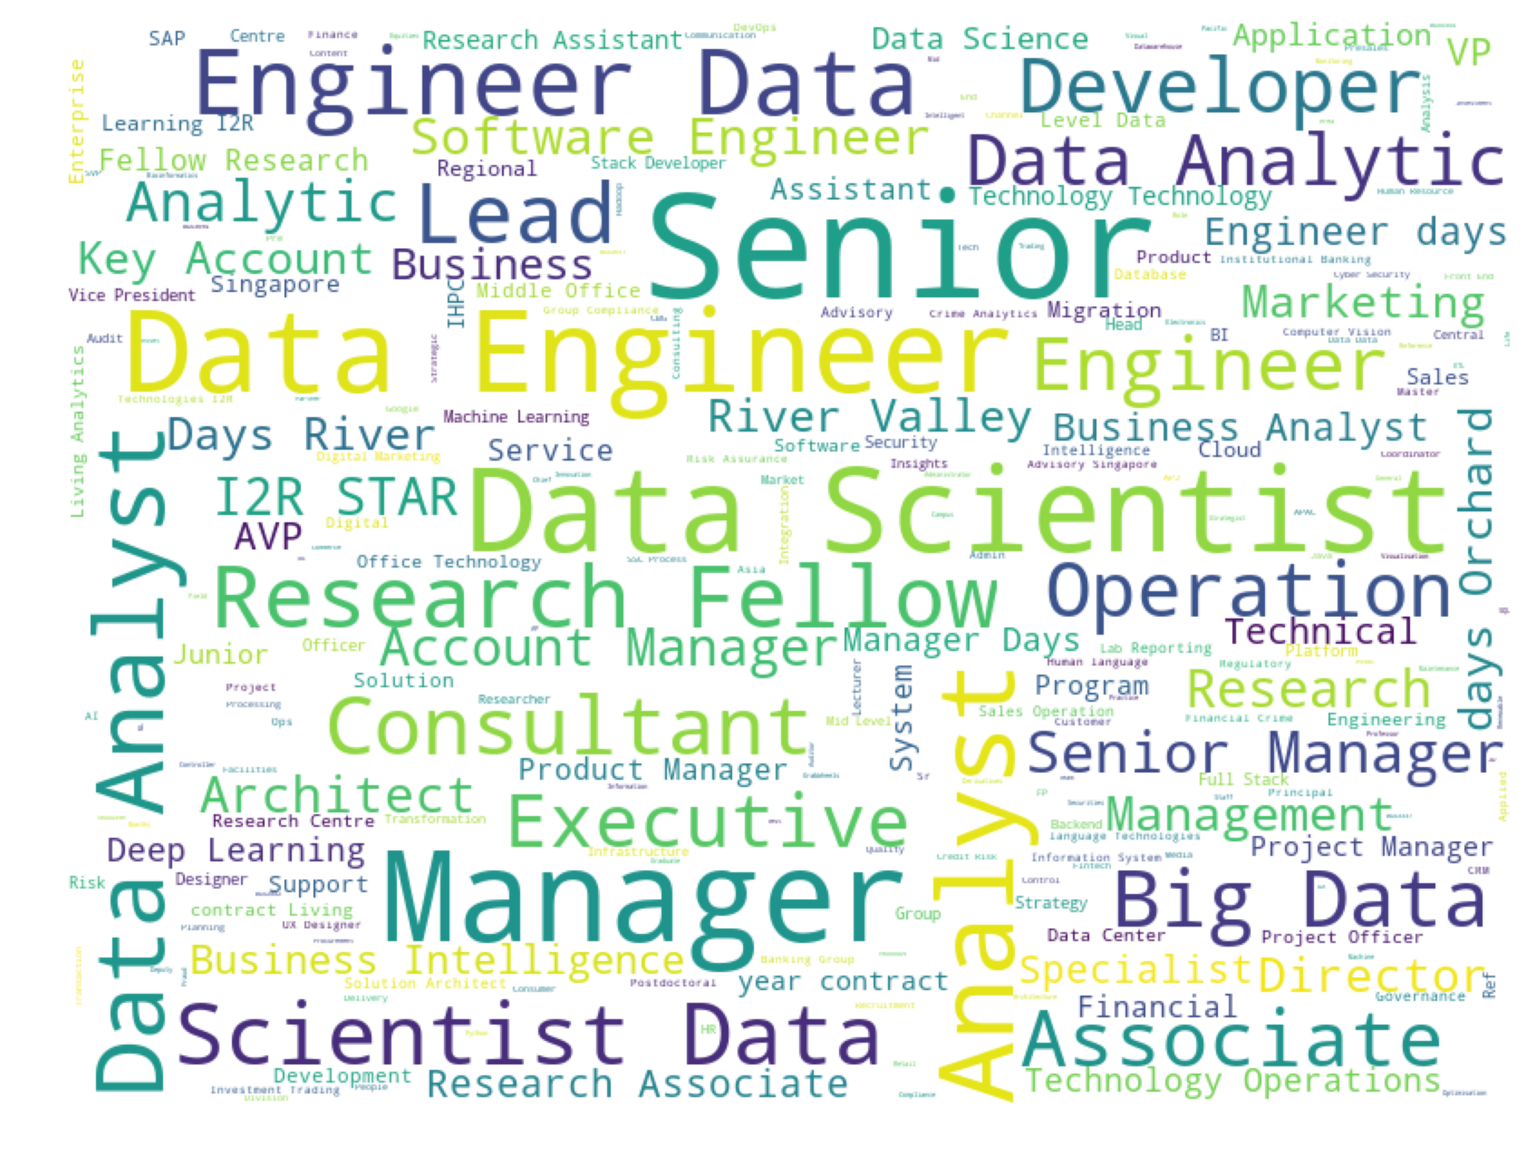

In [28]:
plt.figure(figsize=(20,10))
plt.imshow(titles, interpolation='hamming')
plt.axis("off")
plt.show()

In [30]:
jobs.head()

Company                               Title  \
0  HITACHI CONSULTING SINGAPORE   Senior Consultant (Data Scientist)   
1            TRAVELOKA SERVICES                    Data Science Lead   
2            TRAVELOKA SERVICES          Senior Level Data Scientist   
3            TRAVELOKA SERVICES    Mid - Senior Level Data Scientist   
4            TRAVELOKA SERVICES             Mid Level Data Scientist   

                                    Responsibilities  \
0   Problem solver with curious mindset with a hi...   
1  As a Data scientist, you play a key role to so...   
2  Job Description As a Data scientist, you will ...   
3  As a Data scientist, you will be applying mach...   
4  As a Data scientist, you will be applying mach...   

                                        Requirements         Seniority  \
0   Sound knowledge of machine learning concepts....  Senior Executive   
1  We are looking for someone with:  Passion in b...           Manager   
2    Solid programming skills and understanding o...         Executive   
3    Solid programming skills and understanding o...         Executive   
4    Solid programming skills and understanding o...         Executive   

       Employment_Type                Category  \
0  Permanent, Contract  Information Technology   
1            Full Time  Information Technology   
2            Permanent  Information Technology   
3            Permanent  Information Technology   
4            Permanent  Information Technology   

                                             Address  Salary_Min  Salary_Max  \
0  PLAZA 8 @ CBP, 1 CHANGI BUSINESS PARK CRESCENT...      6000.0      9000.0   
1                                        Undisclosed     10000.0     15000.0   
2                                        Undisclosed      8300.0     15000.0   
3                                        Undisclosed      6100.0     10700.0   
4                                        Undisclosed      4300.0      7600.0   

   Salary_Average  
0          7500.0  
1         12500.0  
2         11650.0  
3          8400.0  
4          5950.0

In [41]:
vect = CountVectorizer(stop_words='english')
vect.fit(jobs['Title'])

print('# of features: {}'.format( len(vect.get_feature_names()) ))

# of features: 550


In [42]:
titles = pd.DataFrame(vect.transform(jobs['Title']).todense(),
                       columns=vect.get_feature_names())

In [48]:
title = vect.get_feature_names()

In [45]:
titles_count = titles.sum(axis=0)
titles_count.sort_values(ascending = False).head(20)

data          356
engineer      183
manager       176
senior        141
analyst       121
research      113
scientist      98
analytics      66
business       53
operations     50
associate      49
technology     45
fellow         43
days           40
developer      38
lead           37
consultant     36
3500           36
big            34
executive      30
dtype: int64

In [69]:
top_titles = titles_count.sort_values(ascending = False).head(10)

In [70]:
cmap = mpl.cm.Blues
mini=min(top_titles)
maxi=max(top_titles)
norm = mpl.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in top_titles]

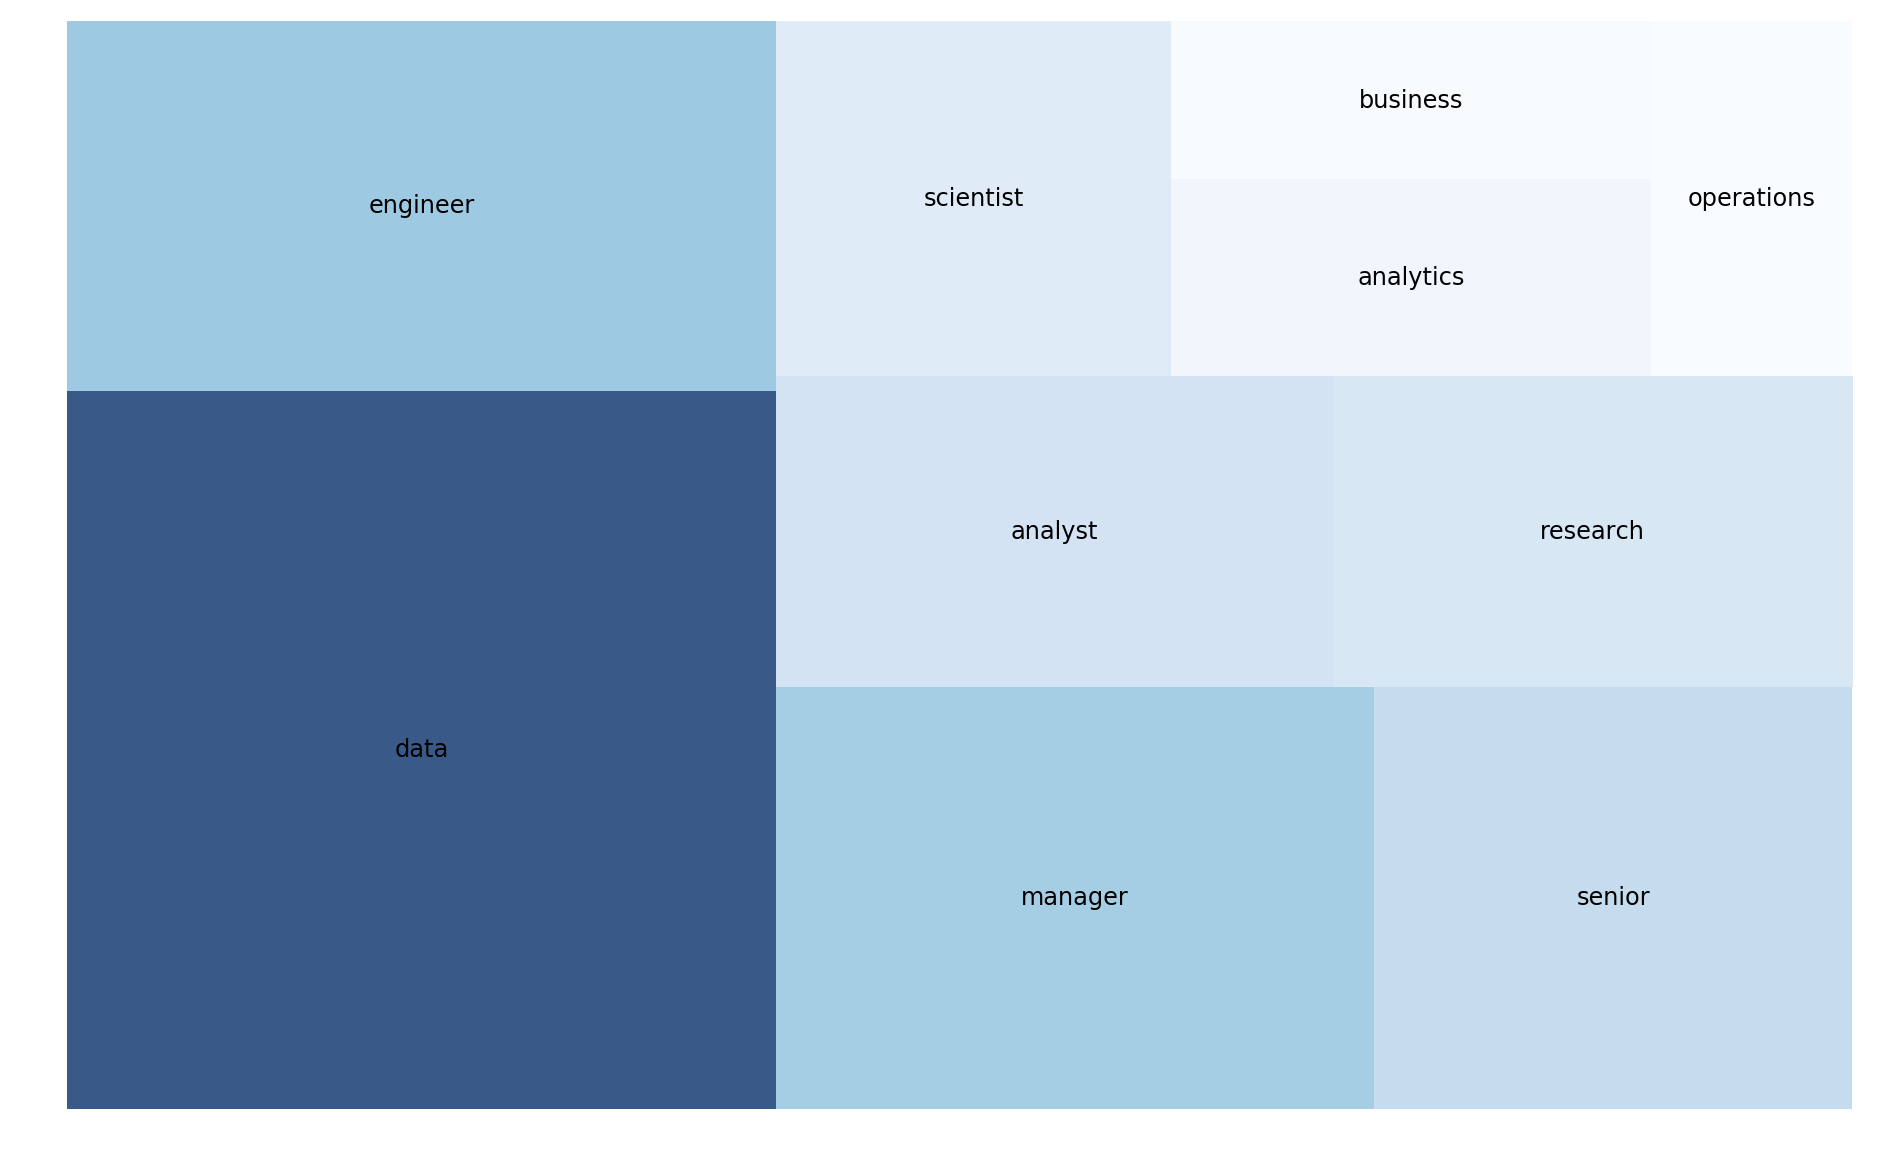

In [71]:
plt.figure(figsize=(16,10))
squarify.plot(sizes=top_titles, label=top_titles.index, alpha=.8, color=colors, text_kwargs={'fontsize':12})
plt.axis('off')
plt.show()


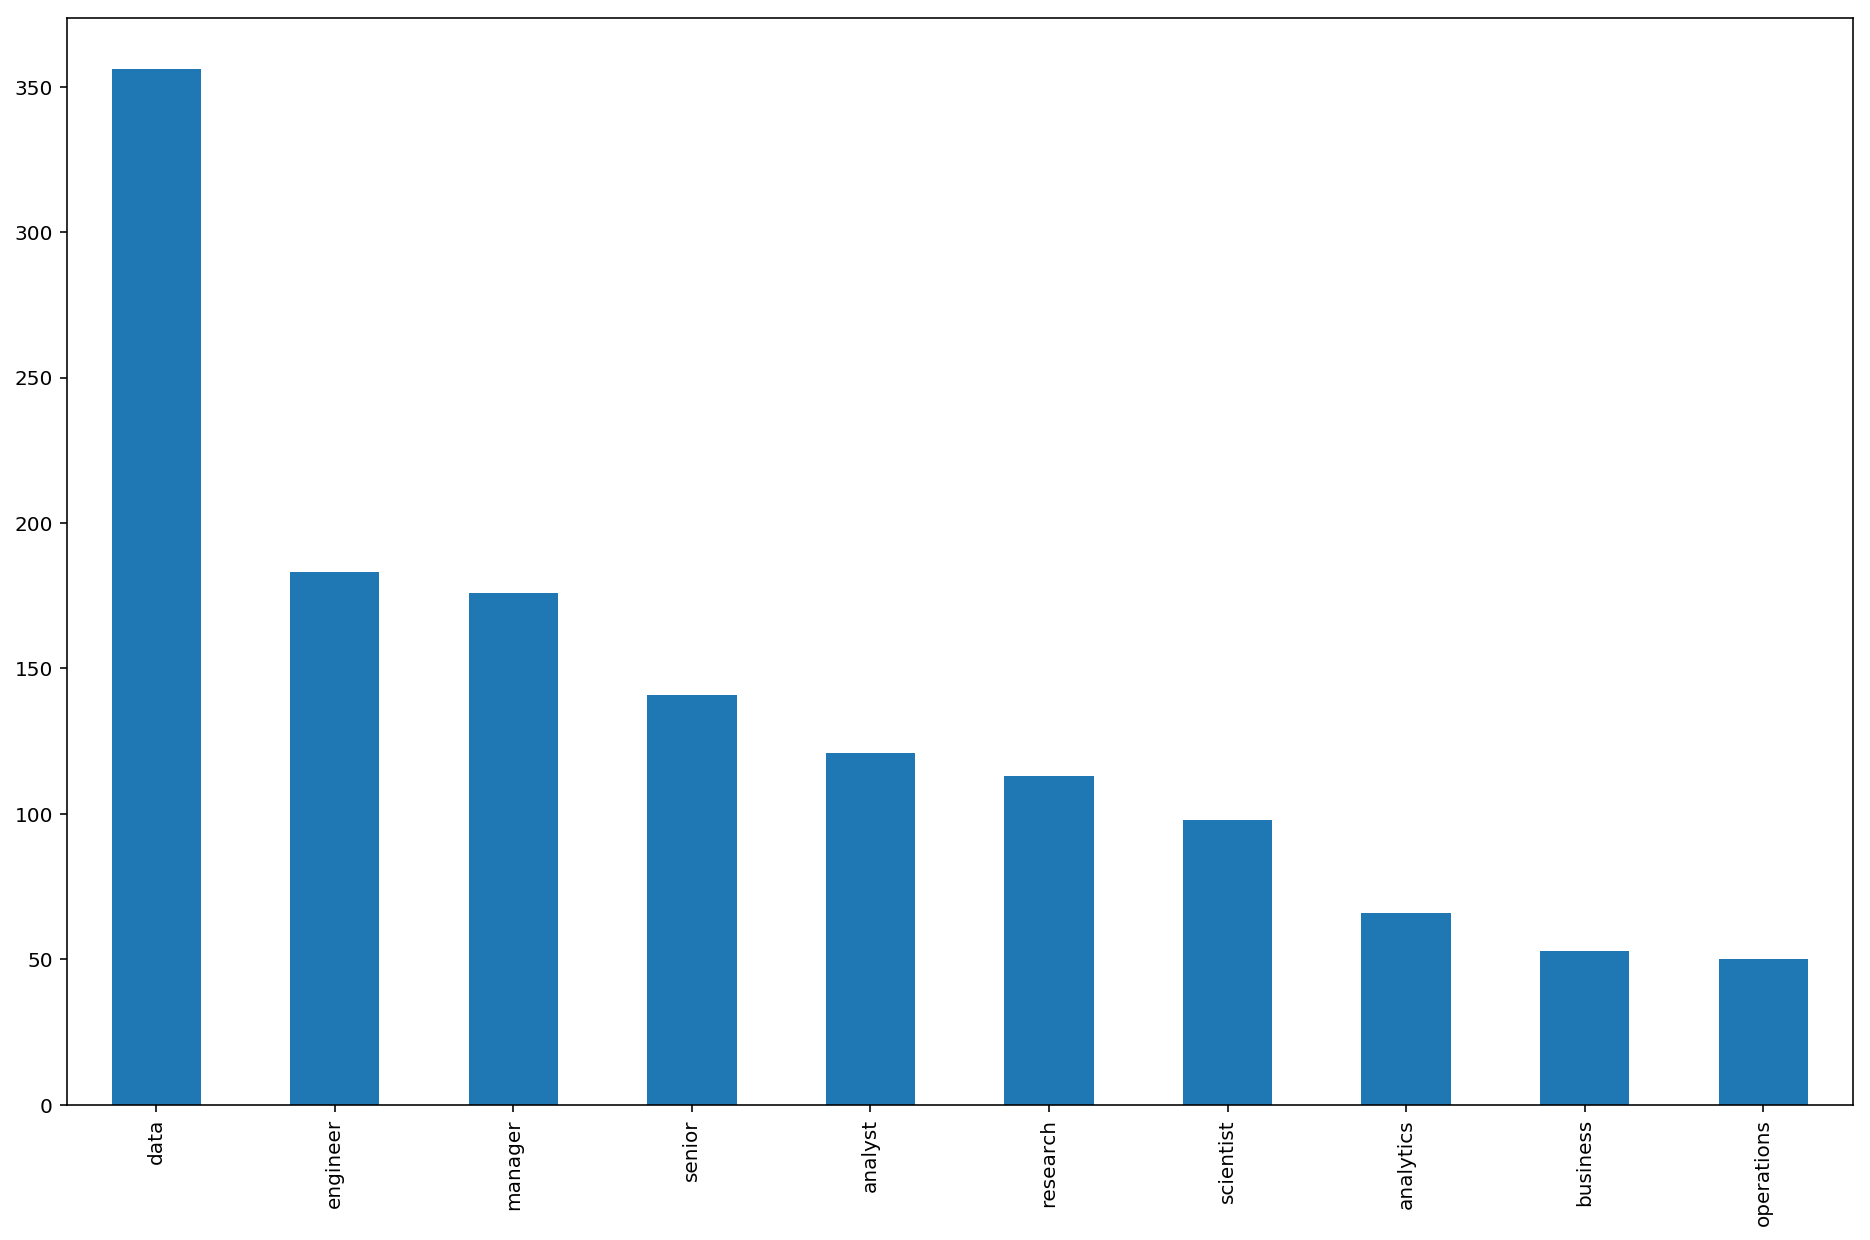

In [74]:
top_titles.plot(kind="bar", figsize=(16, 10))
plt.show()